# SAILS

## (1) Datos de Glottolog

In [1]:
## usamos pandas para leer los datos

import pandas as pd

In [2]:
## diccionario iso:glottocode
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## filtramos por lenguas de las Américas

macroarea = langs[['glottocode','macroarea']]
macroarea = macroarea.dropna()

In [4]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['glottocode'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [5]:
print(len(macroarea))

2382


In [6]:
## familias de las Américas

In [7]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [8]:
languoid

id family_id parent_id                 name  bookkeeping  \
0      3adt1234  afro1255  nort3292           3Ad-Tekles        False   
1      aala1237  aust1307  ramo1244               Aalawa        False   
2      aant1238  nucl1709  nort2920           Aantantara        False   
3      aari1238  sout2845  ahkk1235           Aari-Gayil        False   
4      aari1239  sout2845  aari1238                 Aari        False   
...         ...       ...       ...                  ...          ...   
25434  zuti1239  tupi1275  guaj1255  Guajajára of Zutiua        False   
25435  zuwa1238  koia1260  omie1241              Zuwadza        False   
25436  zwal1238  atla1278  shal1242                Zwall        False   
25437  zyph1238  sino1245  nucl1757                Zyphe        False   
25438  zyud1238  ural1272  komi1269              Zyuzdin        False   

          level  latitude  longitude iso639P3code  description  \
0       dialect       NaN        NaN          NaN          NaN   
1       dialect       NaN        NaN          NaN          NaN   
2       dialect       NaN        NaN          NaN          NaN   
3        family       NaN        NaN          aiz          NaN   
4      language   5.95034    36.5721          aiw          NaN   
...         ...       ...        ...          ...          ...   
25434   dialect       NaN        NaN          NaN          NaN   
25435   dialect       NaN        NaN          NaN          NaN   
25436   dialect       NaN        NaN          NaN          NaN   
25437  language  22.52400    93.2640          zyp          NaN   
25438   dialect       NaN        NaN          NaN          NaN   

       markup_description  child_family_count  child_language_count  \
0                     NaN                   0                     0   
1                     NaN                   0                     0   
2                     NaN                   0                     0   
3                     NaN                   0                     2   
4                     NaN                   0                     0   
...                   ...                 ...                   ...   
25434                 NaN                   0                     0   
25435                 NaN                   0                     0   
25436                 NaN                   0                     0   
25437                 NaN                   0                     0   
25438                 NaN                   0                     0   

       child_dialect_count country_ids  
0                        0         NaN  
1                        0         NaN  
2                        0         NaN  
3                        0         NaN  
4                        0          ET  
...                    ...         ...  
25434                    0         NaN  
25435                    0         NaN  
25436                    0         NaN  
25437                    2       IN MM  
25438                    0         NaN  

[25439 rows x 15 columns]

In [9]:
## filtramos id:family_id (family)

location = languoid[['id','latitude','longitude']]
location = location.dropna()

In [10]:
location_lat = dict(zip(location['id'],location['latitude']))
location_lon = dict(zip(location['id'],location['longitude']))

In [11]:
location = {key:[location_lat[key],location_lon[key]] for key in location_lat.keys()}

In [12]:
len(location)

8437

In [13]:
## filtramos id:family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [14]:
## filtramos id:parent_id (genus)

glotto_iso = languoid[['id','iso639P3code']]
glotto_iso = glotto_iso.dropna()

In [15]:
## transformamos a diccionario

glotto_iso = dict(zip(glotto_iso['id'], glotto_iso['iso639P3code']))
glotto_iso = {language:glotto_iso[language] for language in glotto_iso.keys() if language in macroarea.keys()}

In [16]:
## transformamos a diccionario

id_family = dict(zip(id_family['id'], id_family['family_id']))
ID_family = {language:id_family[language] for language in id_family.keys() if  language in macroarea.keys()}

In [17]:
len(id_family)

25014

In [18]:
id_family['huil1244']

'arau1255'

## (2) Datos de SAILS

In [19]:
## rasgos

features_sails = pd.read_csv('features_sails.csv',sep=',')

In [20]:
features_sails=features_sails.rename(columns={'Unnamed: 0': 'features'})

In [21]:
len(list(features_sails.columns[1:]))

167

In [22]:
features=list(features_sails['features'])

In [23]:
features_pred = {}

for language in list(features_sails.columns[1:]):
    features_pred[language]=dict(zip(features,list(features_sails[language])))

In [24]:
for language in features_pred:
    D=features_pred[language]
    D={k: v for k, v in D.items() if pd.Series(v).notna().all()}
    D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key][-2:]!='NA' and D[key].startswith('ARGEX5')==True} ## estructura argumental
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('TAME')==True} ## tame
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('AND')==True and D[key].startswith('ARW')==False}## todo sin arawak + andean specific
    
    features_pred[language]=D

In [25]:
print(len(features_pred))

167


In [26]:
pd.DataFrame(list(features_pred['mapu1245'].items()),columns=['rasgos', 'valores de rasgos'])

rasgos valores de rasgos
0  ARGEX5-1        ARGEX5-1-C
1  ARGEX5-2        ARGEX5-2-C
2  ARGEX5-3        ARGEX5-3-C
3  ARGEX5-4        ARGEX5-4-C
4  ARGEX5-5        ARGEX5-5-D
5  ARGEX5-6        ARGEX5-6-C
6  ARGEX5-7        ARGEX5-7-C
7  ARGEX5-8        ARGEX5-8-C
8  ARGEX5-9        ARGEX5-9-B

In [27]:
features_pred['mapu1245']

{'ARGEX5-1': 'ARGEX5-1-C',
 'ARGEX5-2': 'ARGEX5-2-C',
 'ARGEX5-3': 'ARGEX5-3-C',
 'ARGEX5-4': 'ARGEX5-4-C',
 'ARGEX5-5': 'ARGEX5-5-D',
 'ARGEX5-6': 'ARGEX5-6-C',
 'ARGEX5-7': 'ARGEX5-7-C',
 'ARGEX5-8': 'ARGEX5-8-C',
 'ARGEX5-9': 'ARGEX5-9-B'}

In [28]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])==9}# and key in id_family.keys()}

In [29]:
print(len(features_pred))

88


In [30]:
for language in features_pred.keys():
    print(language,len(features_pred[language]))

agua1253 9
yane1238 9
apur1254 9
apal1257 9
arhu1242 9
mapu1245 9
karo1305 9
araw1276 9
awet1244 9
cent2142 9
bora1263 9
boro1282 9
baur1253 9
chip1262 9
mose1249 9
cavi1250 9
chay1248 9
chol1284 9
coca1259 9
colo1256 9
cube1242 9
desa1247 9
emer1243 9
nort2972 9
guat1253 9
hixk1239 9
inga1252 9
iton1250 9
jama1261 9
hupd1244 9
juru1256 9
kama1373 9
kari1311 9
daww1239 9
awac1239 9
kano1245 9
leco1242 9
lako1248 9
sate1243 9
mats1244 9
moco1246 9
maku1278 9
wich1262 9
mund1330 9
movi1243 9
moch1259 9
pare1272 9
wari1268 9
paez1247 9
pila1245 9
puin1248 9
hual1241 9
sout2991 9
sout2990 9
sant1432 9
tena1240 9
yauy1235 9
ayac1239 9
cusc1236 9
caja1238 9
imba1240 9
nort2980 9
paca1245 9
sanm1289 9
huay1240 9
sala1272 9
jauj1238 9
cane1242 9
rikb1245 9
saba1268 9
nina1238 9
ship1254 9
saki1248 9
tari1256 9
tehu1242 9
tapi1253 9
trum1247 9
trio1238 9
ikpe1245 9
urar1246 9
uruu1244 9
wara1303 9
wayo1238 9
xava1240 9
kwaz1243 9
yami1256 9
nhen1239 9
yura1255 9


In [31]:
features = []

for language in features_pred.keys():
    features+=[list(features_pred[language].keys())]

In [32]:
features = set(features[0]).intersection(*features[1:])

In [33]:
len(features)

9

familias de las Américas

In [34]:
len(id_family)

25014

In [35]:
id_family = {}

for key in features_pred.keys():
    if key in ID_family.keys():
        id_family[key]=ID_family[key]
    else:
        id_family[key]='unknown'

In [36]:
len(id_family)

88

In [37]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(id_family.items()):
    v[value].append(key)

In [38]:
families = dict(v)

In [39]:
len(families['araw1281'])

6

In [40]:
families

{'jiva1245': ['agua1253'],
 'cari1283': ['apal1257', 'hixk1239', 'ikpe1245', 'trio1238'],
 'araw1281': ['apur1254',
  'araw1276',
  'baur1253',
  'pare1272',
  'tari1256',
  'yane1238'],
 'chib1249': ['arhu1242'],
 'barb1265': ['awac1239', 'colo1256'],
 'tupi1275': ['awet1244',
  'coca1259',
  'emer1243',
  'juru1256',
  'kama1373',
  'kari1311',
  'karo1305',
  'maku1278',
  'mund1330',
  'nhen1239',
  'saki1248',
  'sate1243',
  'tapi1253',
  'wayo1238'],
 'quec1387': ['ayac1239',
  'caja1238',
  'cusc1236',
  'hual1241',
  'huay1240',
  'imba1240',
  'inga1252',
  'jauj1238',
  'nort2980',
  'paca1245',
  'sala1272',
  'sanm1289',
  'sant1432',
  'sout2990',
  'sout2991',
  'tena1240',
  'yauy1235'],
 'bora1262': ['bora1263'],
 'boro1281': ['boro1282'],
 'nucl1710': ['cane1242', 'rikb1245', 'xava1240'],
 'pano1259': ['cavi1250', 'mats1244', 'ship1254', 'yami1256'],
 'ayma1253': ['cent2142'],
 'cahu1265': ['chay1248'],
 'uruc1242': ['chip1262', 'uruu1244'],
 'hibi1242': ['chol1284'],

In [41]:
import numpy as np

L=[]
for fam in families.keys():
    L+=[len(families[fam])]
    print(fam,len(families[fam]))
print(np.mean(L))

jiva1245 1
cari1283 4
araw1281 6
chib1249 1
barb1265 2
tupi1275 14
quec1387 17
bora1262 1
boro1281 1
nucl1710 3
pano1259 4
ayma1253 1
cahu1265 1
uruc1242 2
hibi1242 1
tuca1253 2
nada1235 2
unknown 14
araw1282 1
namb1299 2
arau1255 1
guai1249 2
yano1268 1
choc1280 1
chon1288 1
chap1271 1
mata1289 1
3.259259259259259


## (3) entropy x feature

In [42]:
features_pred['mapu1245']

{'ARGEX5-1': 'ARGEX5-1-C',
 'ARGEX5-2': 'ARGEX5-2-C',
 'ARGEX5-3': 'ARGEX5-3-C',
 'ARGEX5-4': 'ARGEX5-4-C',
 'ARGEX5-5': 'ARGEX5-5-D',
 'ARGEX5-6': 'ARGEX5-6-C',
 'ARGEX5-7': 'ARGEX5-7-C',
 'ARGEX5-8': 'ARGEX5-8-C',
 'ARGEX5-9': 'ARGEX5-9-B'}

In [43]:
from math import log, e
def entropy(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

In [44]:
#from scipy.stats import entropy

def entropy_area(feature,area):
    feature_values = [features_pred[L][feature] for L in area]
    return entropy(feature_values)#[dict_features[f] for f in feature_values])

In [45]:
entropy_area('ARGEX5-1',list(features_pred.keys()))

0.10847133903591605

In [46]:
entropy_area('ARGEX5-1',families['araw1281'])

-0.0

In [47]:
D_all_dict = {}

for feature in features_pred['mapu1245'].keys():
    D_all_dict[feature]=entropy_area(feature,list(features_pred.keys()))/entropy(range(len(list(features_pred.keys()))))

In [48]:
D_all = pd.DataFrame.from_dict(D_all_dict,orient='index').T
D_all['average entropy'] = D_all.mean(numeric_only=True, axis=1)

In [49]:
D_all

ARGEX5-1  ARGEX5-2  ARGEX5-3  ARGEX5-4  ARGEX5-5  ARGEX5-6  ARGEX5-7  \
0  0.024227  0.088961    0.1464  0.130871  0.260305  0.218803  0.239479   

   ARGEX5-8  ARGEX5-9  average entropy  
0  0.213944  0.096158         0.157683

## (4) entropy x feature x family

In [50]:
D = {feature:{} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for fam in families.keys():
        if len(families[fam])>=3:
            D[feature][fam]=entropy_area(feature,families[fam])/entropy(range(len(families[fam])))

In [51]:
D_family = pd.DataFrame.from_dict(D)
D_family['average entropy'] = D_family.mean(numeric_only=True, axis=1)
languages = [len(families[fam]) for fam in D_family.index]
D_family['number of languages'] = languages

In [52]:
D_family

ARGEX5-1  ARGEX5-2  ARGEX5-3  ARGEX5-4  ARGEX5-5  ARGEX5-6  \
cari1283      -0.0 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000   
araw1281      -0.0 -0.000000  0.251463  0.355245  0.251463  0.251463   
tupi1275      -0.0 -0.000000  0.097504  0.155403  0.097504  0.097504   
quec1387      -0.0 -0.000000  0.078963 -0.000000  0.078963 -0.000000   
nucl1710      -0.0  0.579380 -0.000000 -0.000000  0.579380  0.579380   
pano1259      -0.0 -0.000000 -0.000000 -0.000000  0.405639 -0.000000   
unknown       -0.0  0.155403  0.155403  0.262650  0.389728  0.338044   

          ARGEX5-7  ARGEX5-8  ARGEX5-9  average entropy  number of languages  
cari1283 -0.000000 -0.000000  0.405639         0.045071                    4  
araw1281  0.251463  0.386853 -0.000000         0.194217                    6  
tupi1275  0.340351  0.248564  0.097504         0.126037                   14  
quec1387 -0.000000  0.229156 -0.000000         0.043009                   17  
nucl1710  1.000000 -0.000000  0.579380         0.368613                    3  
pano1259  0.405639 -0.000000 -0.000000         0.090142                    4  
unknown   0.362137  0.402016  0.248564         0.257105                   14

## (5) entropy x feature x geographical area

In [53]:
areas_birchall = pd.read_csv('areas_birchall.csv',sep=',')

In [54]:
areas_birchall = dict(zip(areas_birchall['languages'],areas_birchall['areas']))

In [55]:
dict_name_areas = {1:'Northern Andes',2:'Guyana Shield',3:'Central Andes',4:'Western Amazonia',
                  5:'Southern Amazonia',6:'Chaco-Planalto',7:'Southern Cone'}

In [56]:
areas_birchall = {key:dict_name_areas[areas_birchall[key]] for key in features_pred.keys()}

In [57]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(areas_birchall.items()):
    v[value].append(key)

In [58]:
areas = dict(v)

In [59]:
## languages x area

for A in areas.keys():
    print(A,len(areas[A]))

Western Amazonia 18
Guyana Shield 7
Northern Andes 10
Southern Amazonia 25
Central Andes 17
Chaco-Planalto 9
Southern Cone 2


In [60]:
D_areas = {feature:{} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for fam in areas.keys():
        D_areas[feature][fam]=entropy_area(feature,areas[fam])/entropy(range(len(areas[fam])))

In [61]:
D_areas = pd.DataFrame.from_dict(D_areas)
D_areas['average entropy'] = D_areas.mean(numeric_only=True, axis=1)
languages = [len(areas[fam]) for fam in D_areas.index]
D_areas['number of languages'] = languages

In [62]:
D_areas

ARGEX5-1  ARGEX5-2  ARGEX5-3  ARGEX5-4  ARGEX5-5  ARGEX5-6  \
Western Amazonia  -0.000000  0.204417  0.237672  0.204417  0.477485  0.370902   
Guyana Shield     -0.000000  0.210758 -0.000000 -0.000000  0.210758  0.210758   
Northern Andes     0.141182  0.217322  0.217322 -0.000000  0.389973  0.217322   
Southern Amazonia -0.000000  0.086605  0.113992  0.209083  0.214502  0.197275   
Central Andes     -0.000000 -0.000000  0.213820  0.127844  0.265767  0.164477   
Chaco-Planalto    -0.000000  0.158760  0.158760  0.312650  0.241080  0.311183   
Southern Cone      1.000000  1.000000 -0.000000 -0.000000  1.000000  1.000000   

                   ARGEX5-7  ARGEX5-8  ARGEX5-9  average entropy  \
Western Amazonia   0.406740  0.311693  0.074232         0.254173   
Guyana Shield      0.409223 -0.000000  0.210758         0.139140   
Northern Andes     0.277528  0.348225 -0.000000         0.200986   
Southern Amazonia  0.308722  0.326587  0.171045         0.180868   
Central Andes      0.164477  0.229156 -0.000000         0.129505   
Chaco-Planalto     0.426396  0.289690  0.452856         0.261264   
Southern Cone      1.000000 -0.000000 -0.000000         0.555556   

                   number of languages  
Western Amazonia                    18  
Guyana Shield                        7  
Northern Andes                      10  
Southern Amazonia                   25  
Central Andes                       17  
Chaco-Planalto                       9  
Southern Cone                        2

In [63]:
features_areas_pairs = {feature:{A:{} for A in dict_name_areas.values()} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for A in dict_name_areas.values():
        for AA in dict_name_areas.values():
            area_join = areas[A]+areas[AA]
            features_areas_pairs[feature][A][AA]=entropy_area(feature,area_join)/entropy(range(len(area_join)))

In [64]:
D_features_areas_pairs = pd.DataFrame.from_dict(features_areas_pairs['ARGEX5-5'])

In [65]:
D_features_areas_pairs

Northern Andes  Guyana Shield  Central Andes  \
Northern Andes           0.299742       0.438462       0.300419   
Guyana Shield            0.438462       0.155403       0.307166   
Central Andes            0.300419       0.307166       0.213527   
Western Amazonia         0.398804       0.403315       0.344794   
Southern Amazonia        0.303897       0.193960       0.246536   
Chaco-Planalto           0.400248       0.217098       0.252470   
Southern Cone            0.482452       0.311183       0.298368   

                   Western Amazonia  Southern Amazonia  Chaco-Planalto  \
Northern Andes             0.398804           0.303897        0.400248   
Guyana Shield              0.403315           0.193960        0.217098   
Central Andes              0.344794           0.246536        0.252470   
Western Amazonia           0.385127           0.300064        0.387211   
Southern Amazonia          0.300064           0.176496        0.190677   
Chaco-Planalto             0.387211           0.190677        0.183266   
Southern Cone              0.459396           0.228914        0.316756   

                   Southern Cone  
Northern Andes          0.482452  
Guyana Shield           0.311183  
Central Andes           0.298368  
Western Amazonia        0.459396  
Southern Amazonia       0.228914  
Chaco-Planalto          0.316756  
Southern Cone           0.500000

In [66]:
import itertools

lev_areas_pairs = {feature:{A:{} for A in dict_name_areas.values()} for feature in features_pred['mapu1245'].keys()}
for feature in features_pred['mapu1245'].keys():
    for A in dict_name_areas.values():
        for AA in dict_name_areas.values():
            values_features = {A:[],AA:[]}
            for language in set(areas[A]+areas[AA]):
                values_features[areas_birchall[language]]+=[features_pred[language][feature]]
            #if A=='Southern Amazonia' and AA=='Guyana Shield':
            #    print(values_features)
            products = itertools.product(values_features[A],values_features[AA])
            LEN=0
            N=0
            for v1, v2 in products:
                if v1!=v2:
                    LEN+=1
                N+=1
            lev_areas_pairs[feature][A][AA]=LEN/N#en([product for product in products if product[0]!=product[1]])/len(list(products))
            #except ZeroDivisionError:
            #    lev_areas_pairs[feature][A][AA]=0

In [67]:
D_lev_areas_pairs = pd.DataFrame.from_dict(lev_areas_pairs['ARGEX5-1'])

In [68]:
D_lev_areas_pairs

Northern Andes  Guyana Shield  Central Andes  \
Northern Andes               0.18            0.1            0.1   
Guyana Shield                0.10            0.0            0.0   
Central Andes                0.10            0.0            0.0   
Western Amazonia             0.10            0.0            0.0   
Southern Amazonia            0.10            0.0            0.0   
Chaco-Planalto               0.10            0.0            0.0   
Southern Cone                0.50            0.5            0.5   

                   Western Amazonia  Southern Amazonia  Chaco-Planalto  \
Northern Andes                  0.1                0.1             0.1   
Guyana Shield                   0.0                0.0             0.0   
Central Andes                   0.0                0.0             0.0   
Western Amazonia                0.0                0.0             0.0   
Southern Amazonia               0.0                0.0             0.0   
Chaco-Planalto                  0.0                0.0             0.0   
Southern Cone                   0.5                0.5             0.5   

                   Southern Cone  
Northern Andes               0.5  
Guyana Shield                0.5  
Central Andes                0.5  
Western Amazonia             0.5  
Southern Amazonia            0.5  
Chaco-Planalto               0.5  
Southern Cone                0.5

In [69]:
from itertools import combinations

pairs_non = [pair for pair in combinations(dict_name_areas.values(),2) if pair[0]!=pair[1] and pair[0]!='Southern Cone' and pair[1]!='Southern Cone']

In [70]:
len(pairs_non)

15

In [71]:
pairs_non_dict_entropy = {feature:{} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for pair in pairs_non:
        pairs_non_dict_entropy[feature][pair]=features_areas_pairs[feature][pair[0]][pair[1]]

In [72]:
pairs_non_dict_lev = {feature:{} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for pair in pairs_non:
        pairs_non_dict_lev[feature][pair]=lev_areas_pairs[feature][pair[0]][pair[1]]

In [73]:
!pip install adjustText

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [74]:
from adjustText import adjust_text

coefficient of determination: 0.8920616607995058


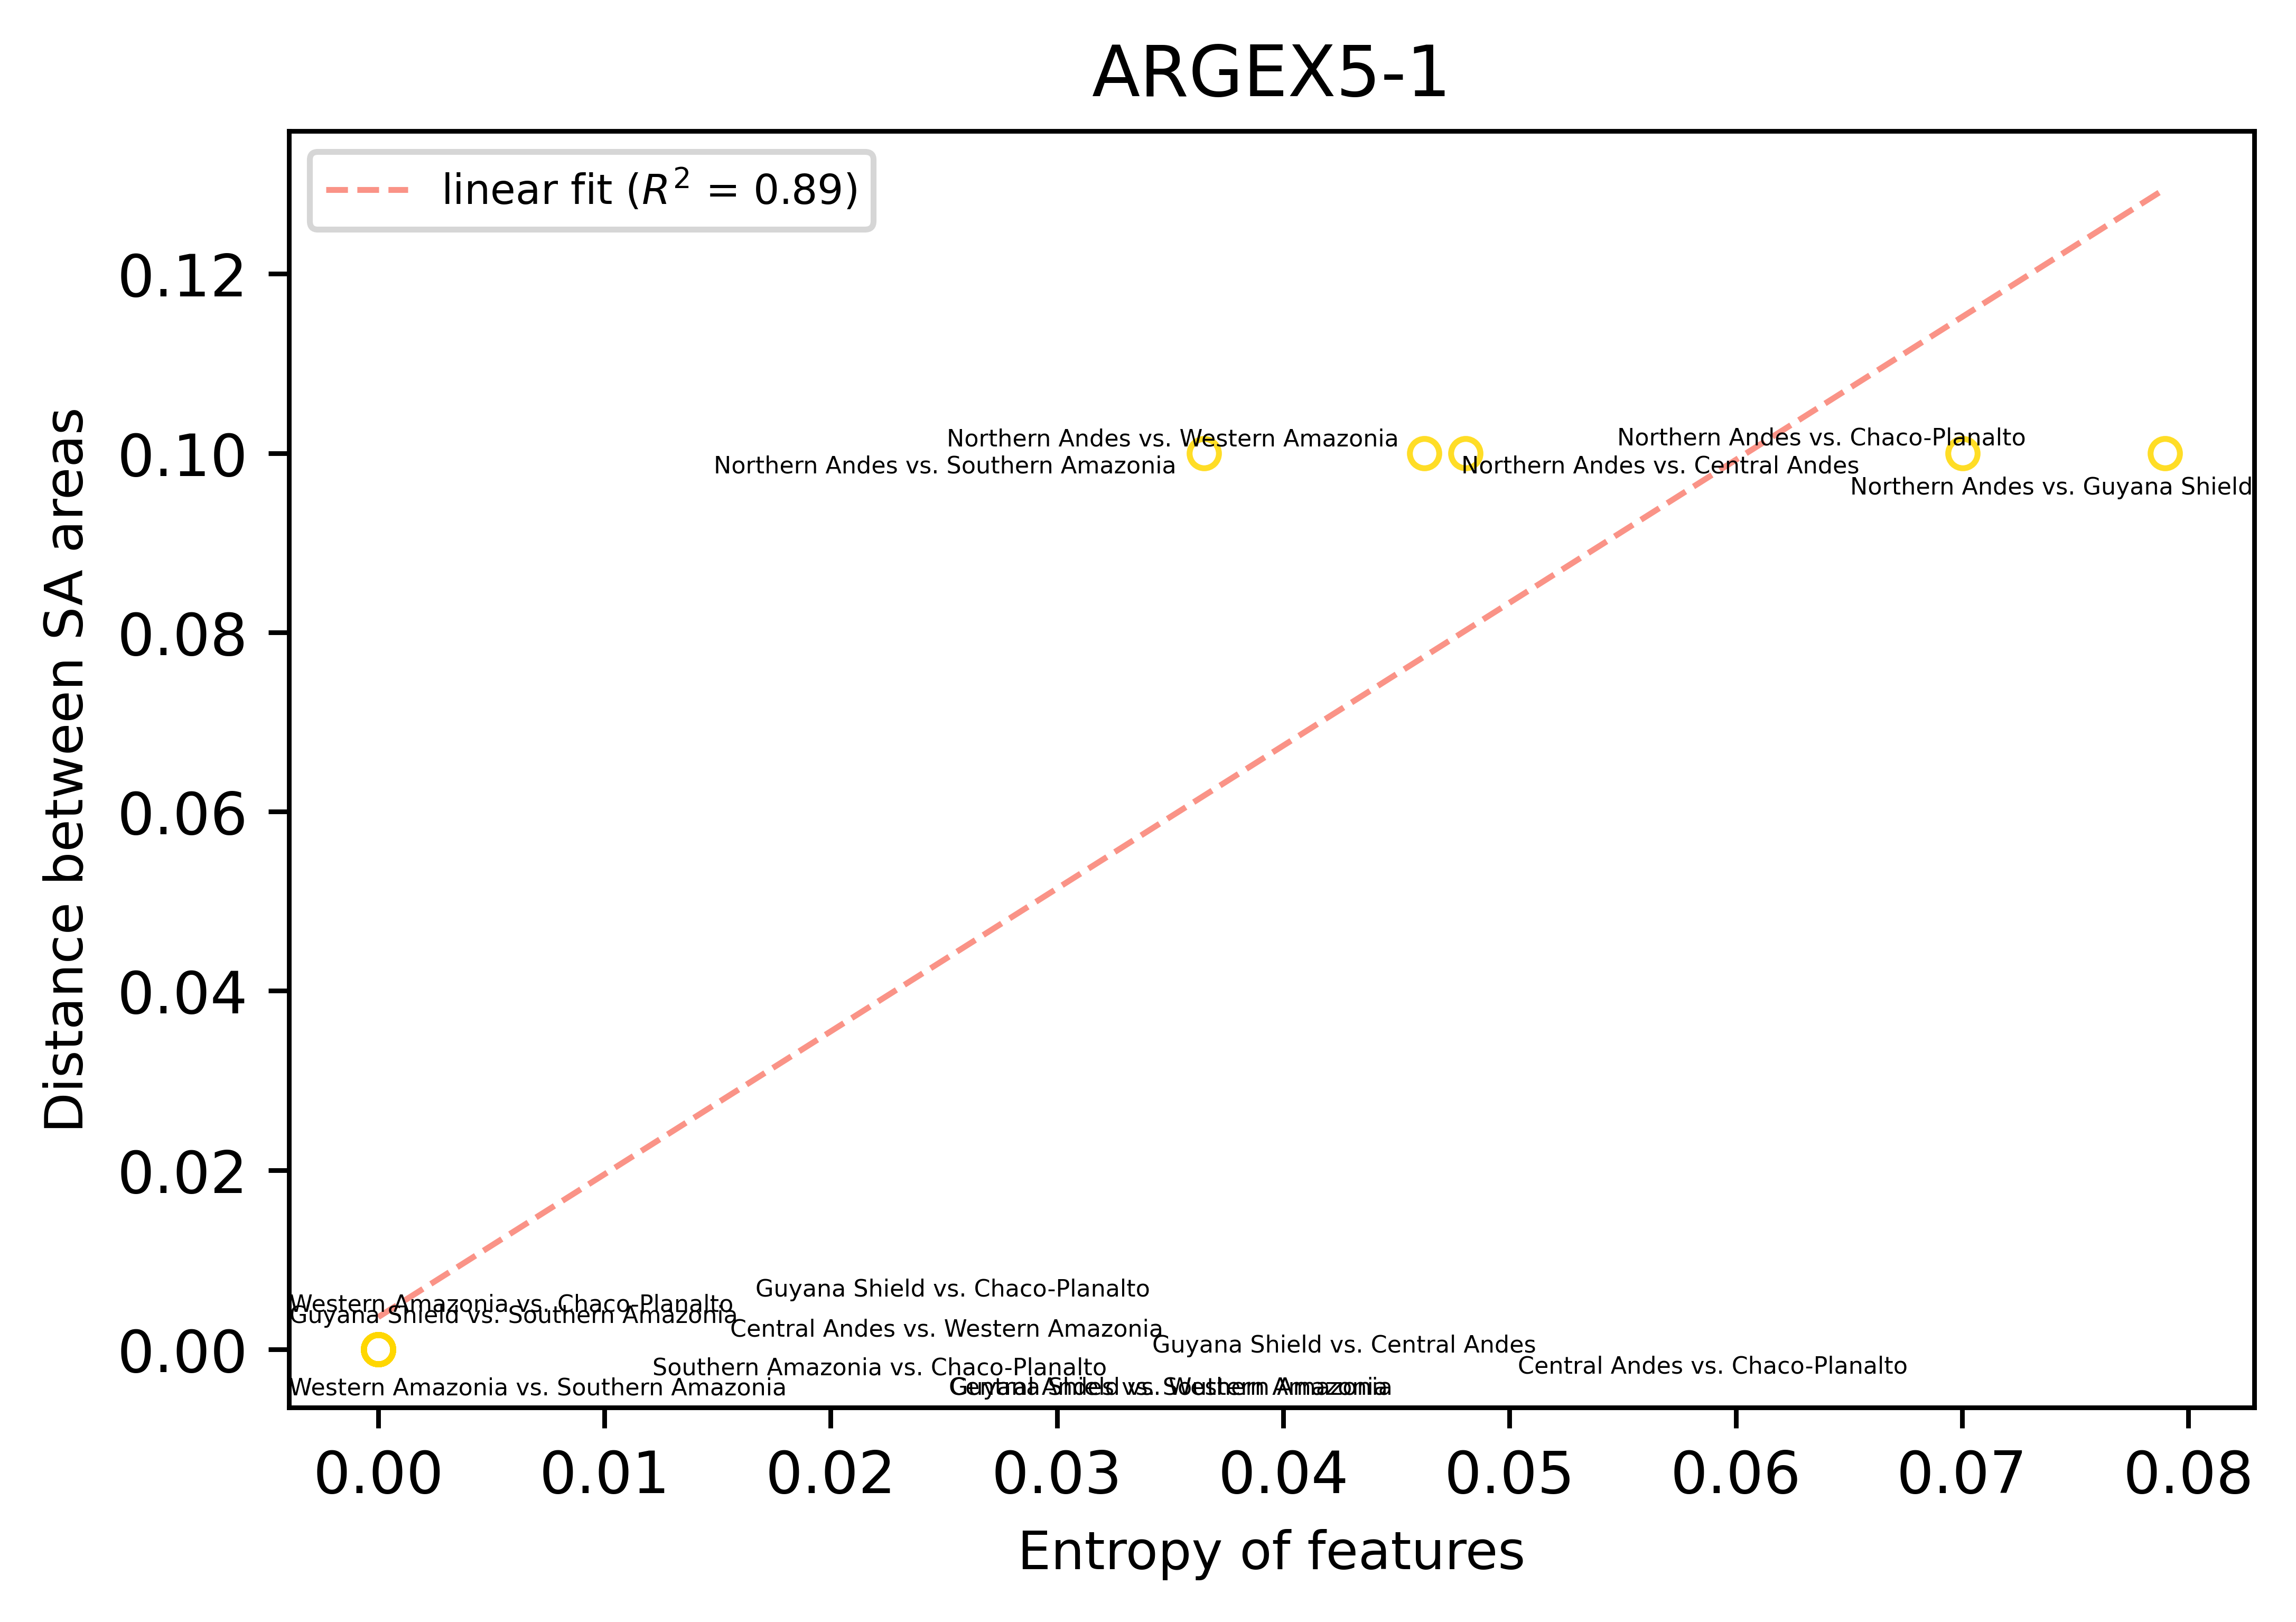

coefficient of determination: 0.8336429642088982


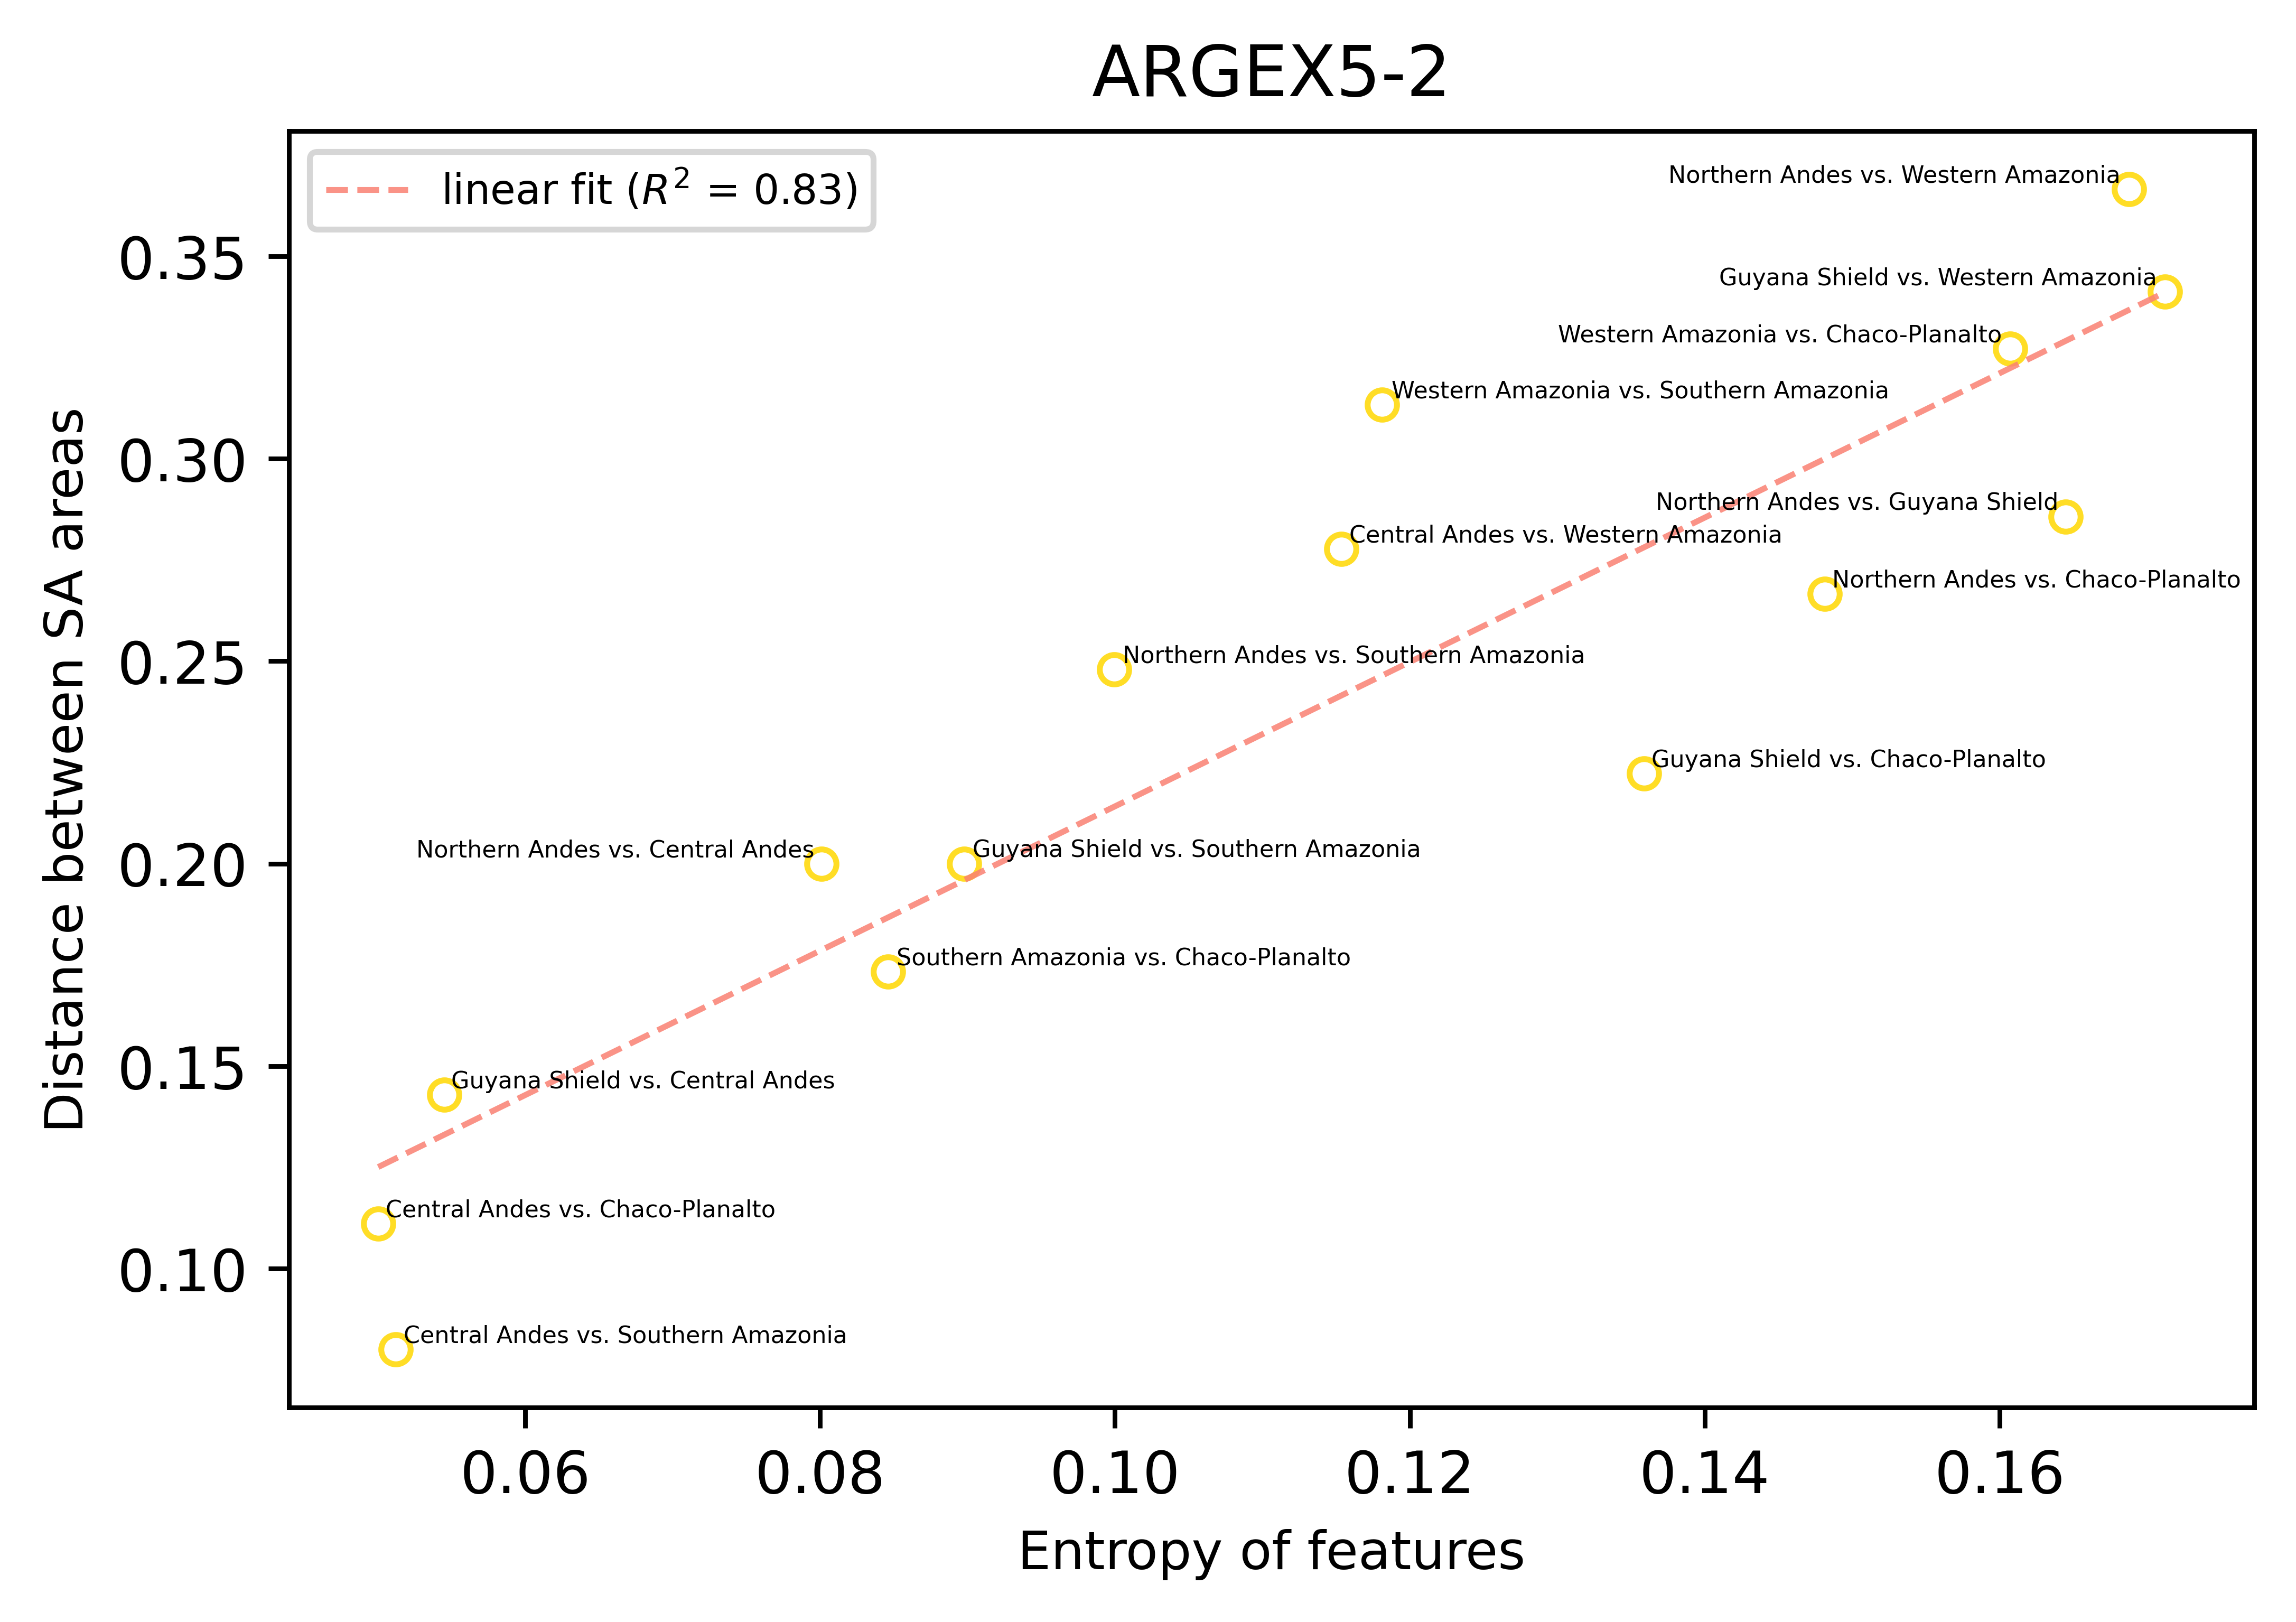

coefficient of determination: 0.8007236039488287


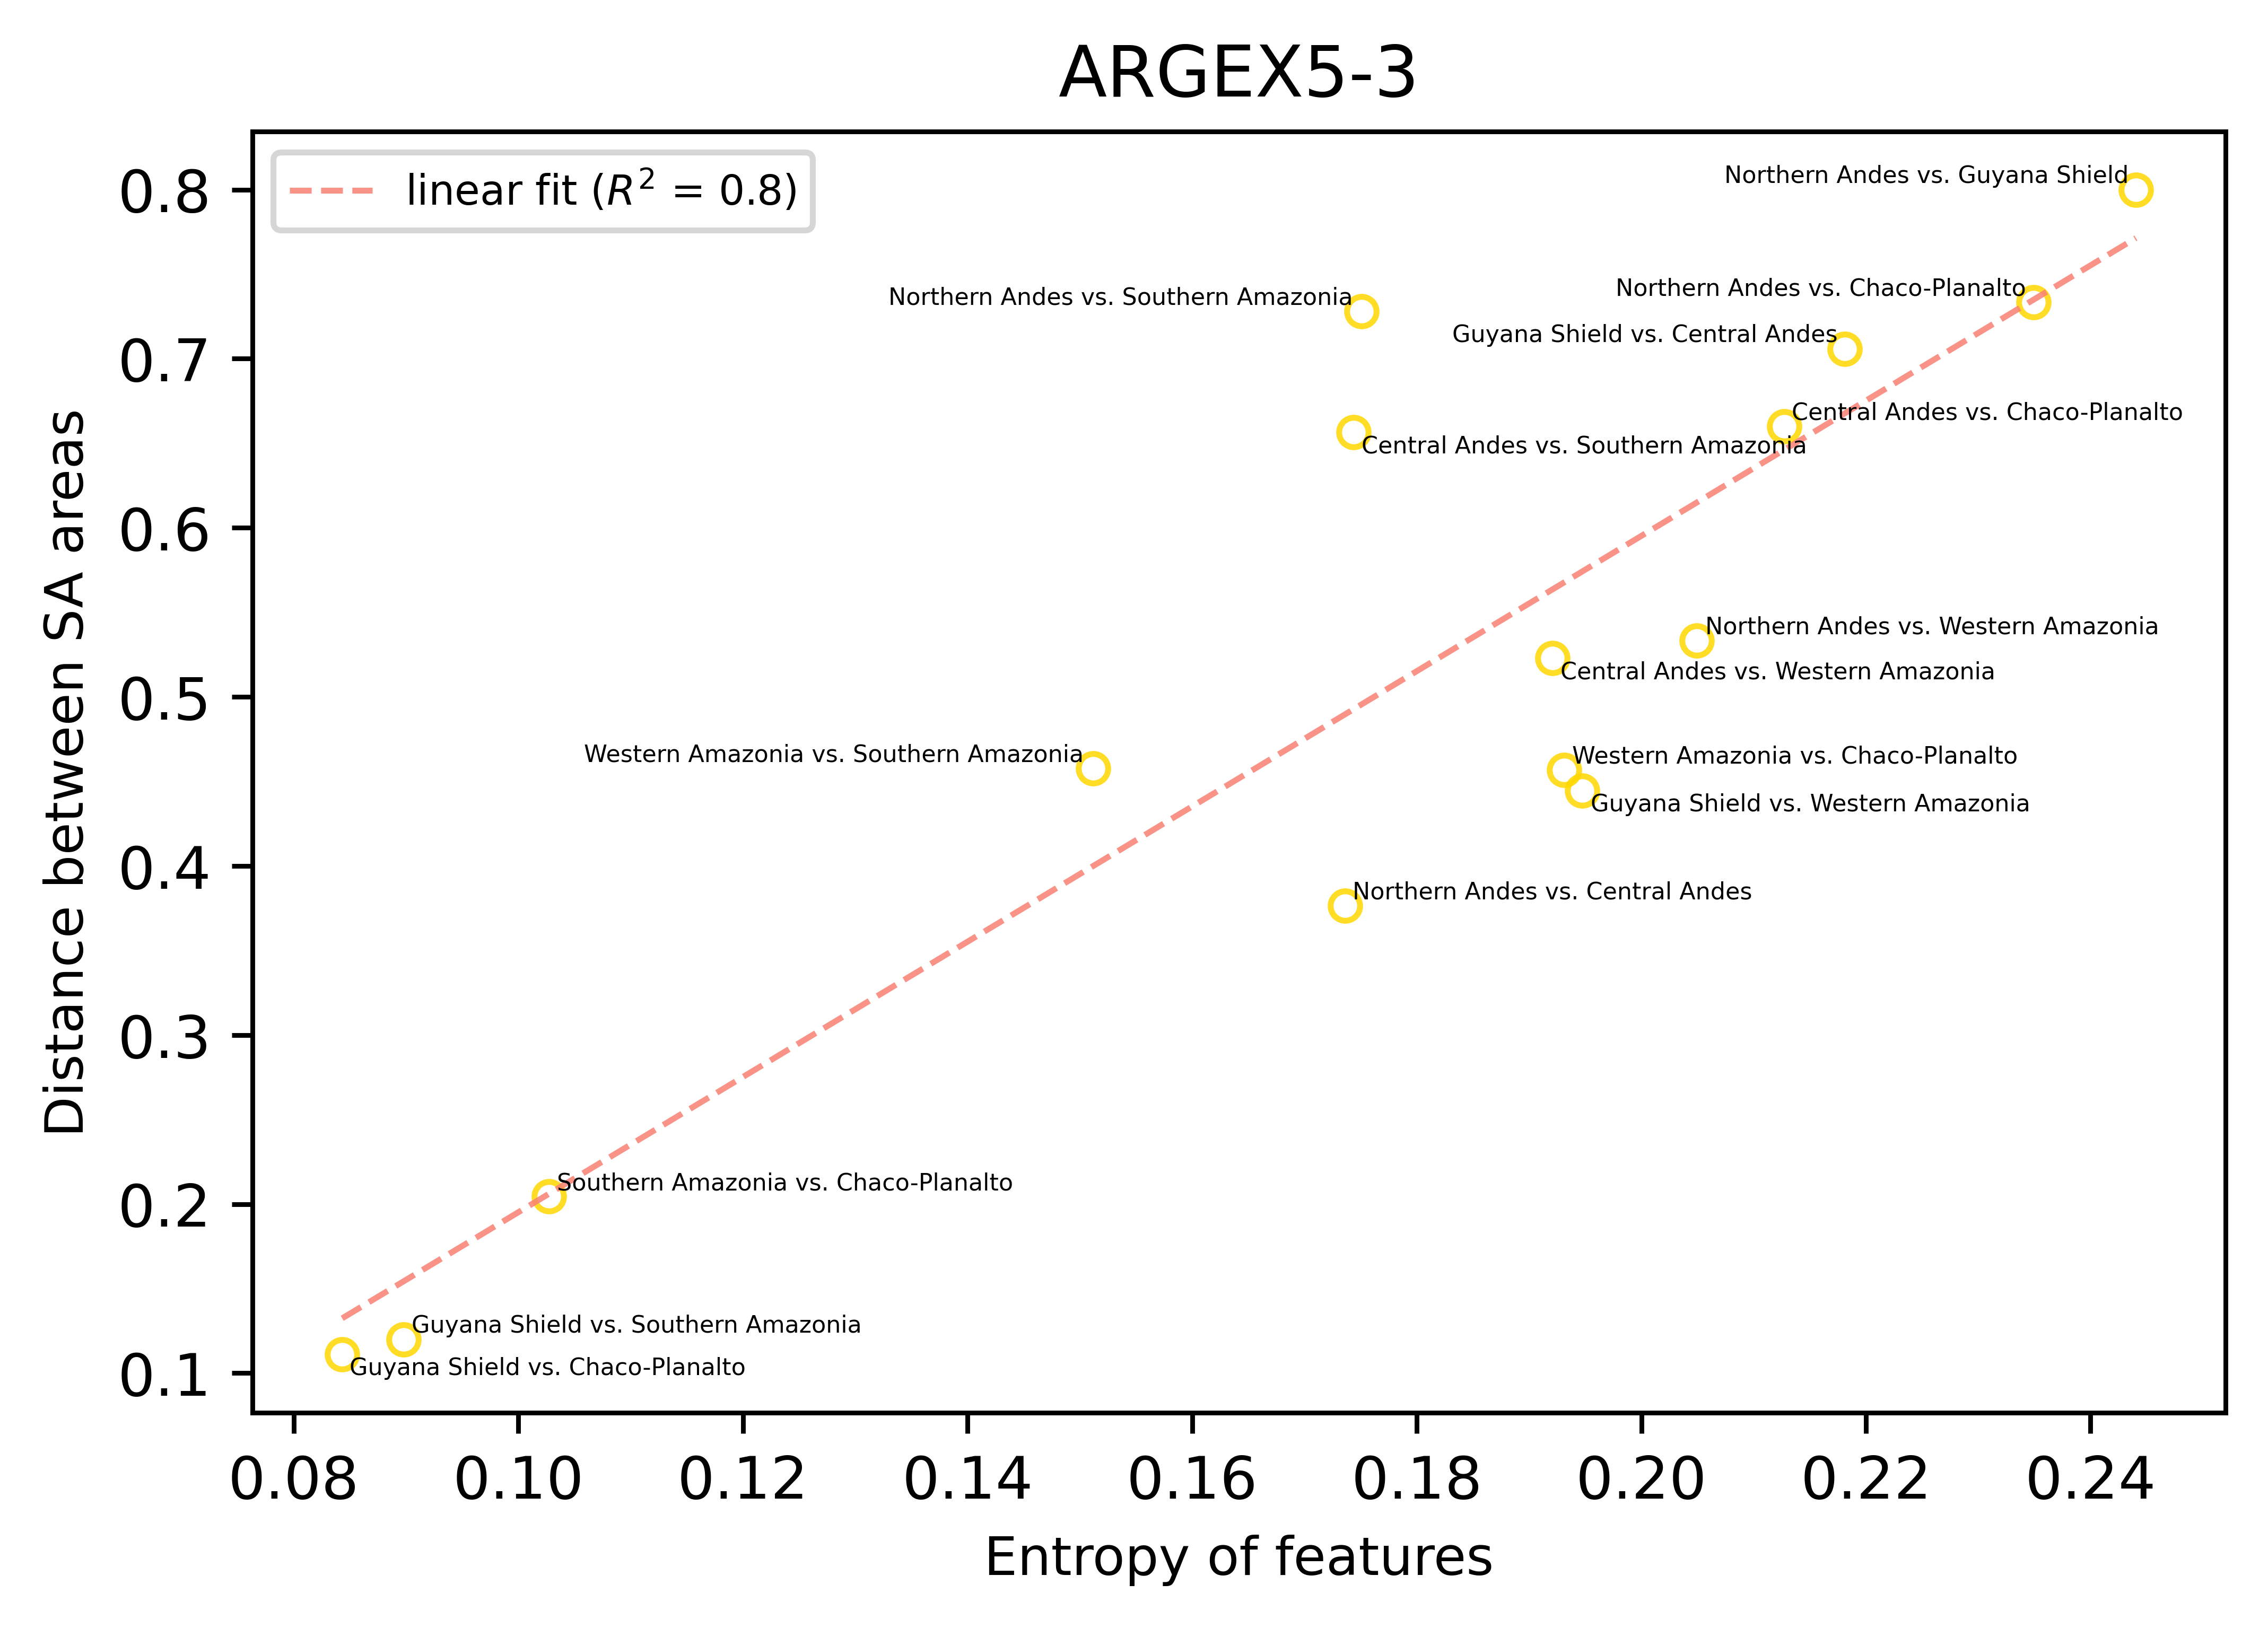

coefficient of determination: 0.8993357416180394


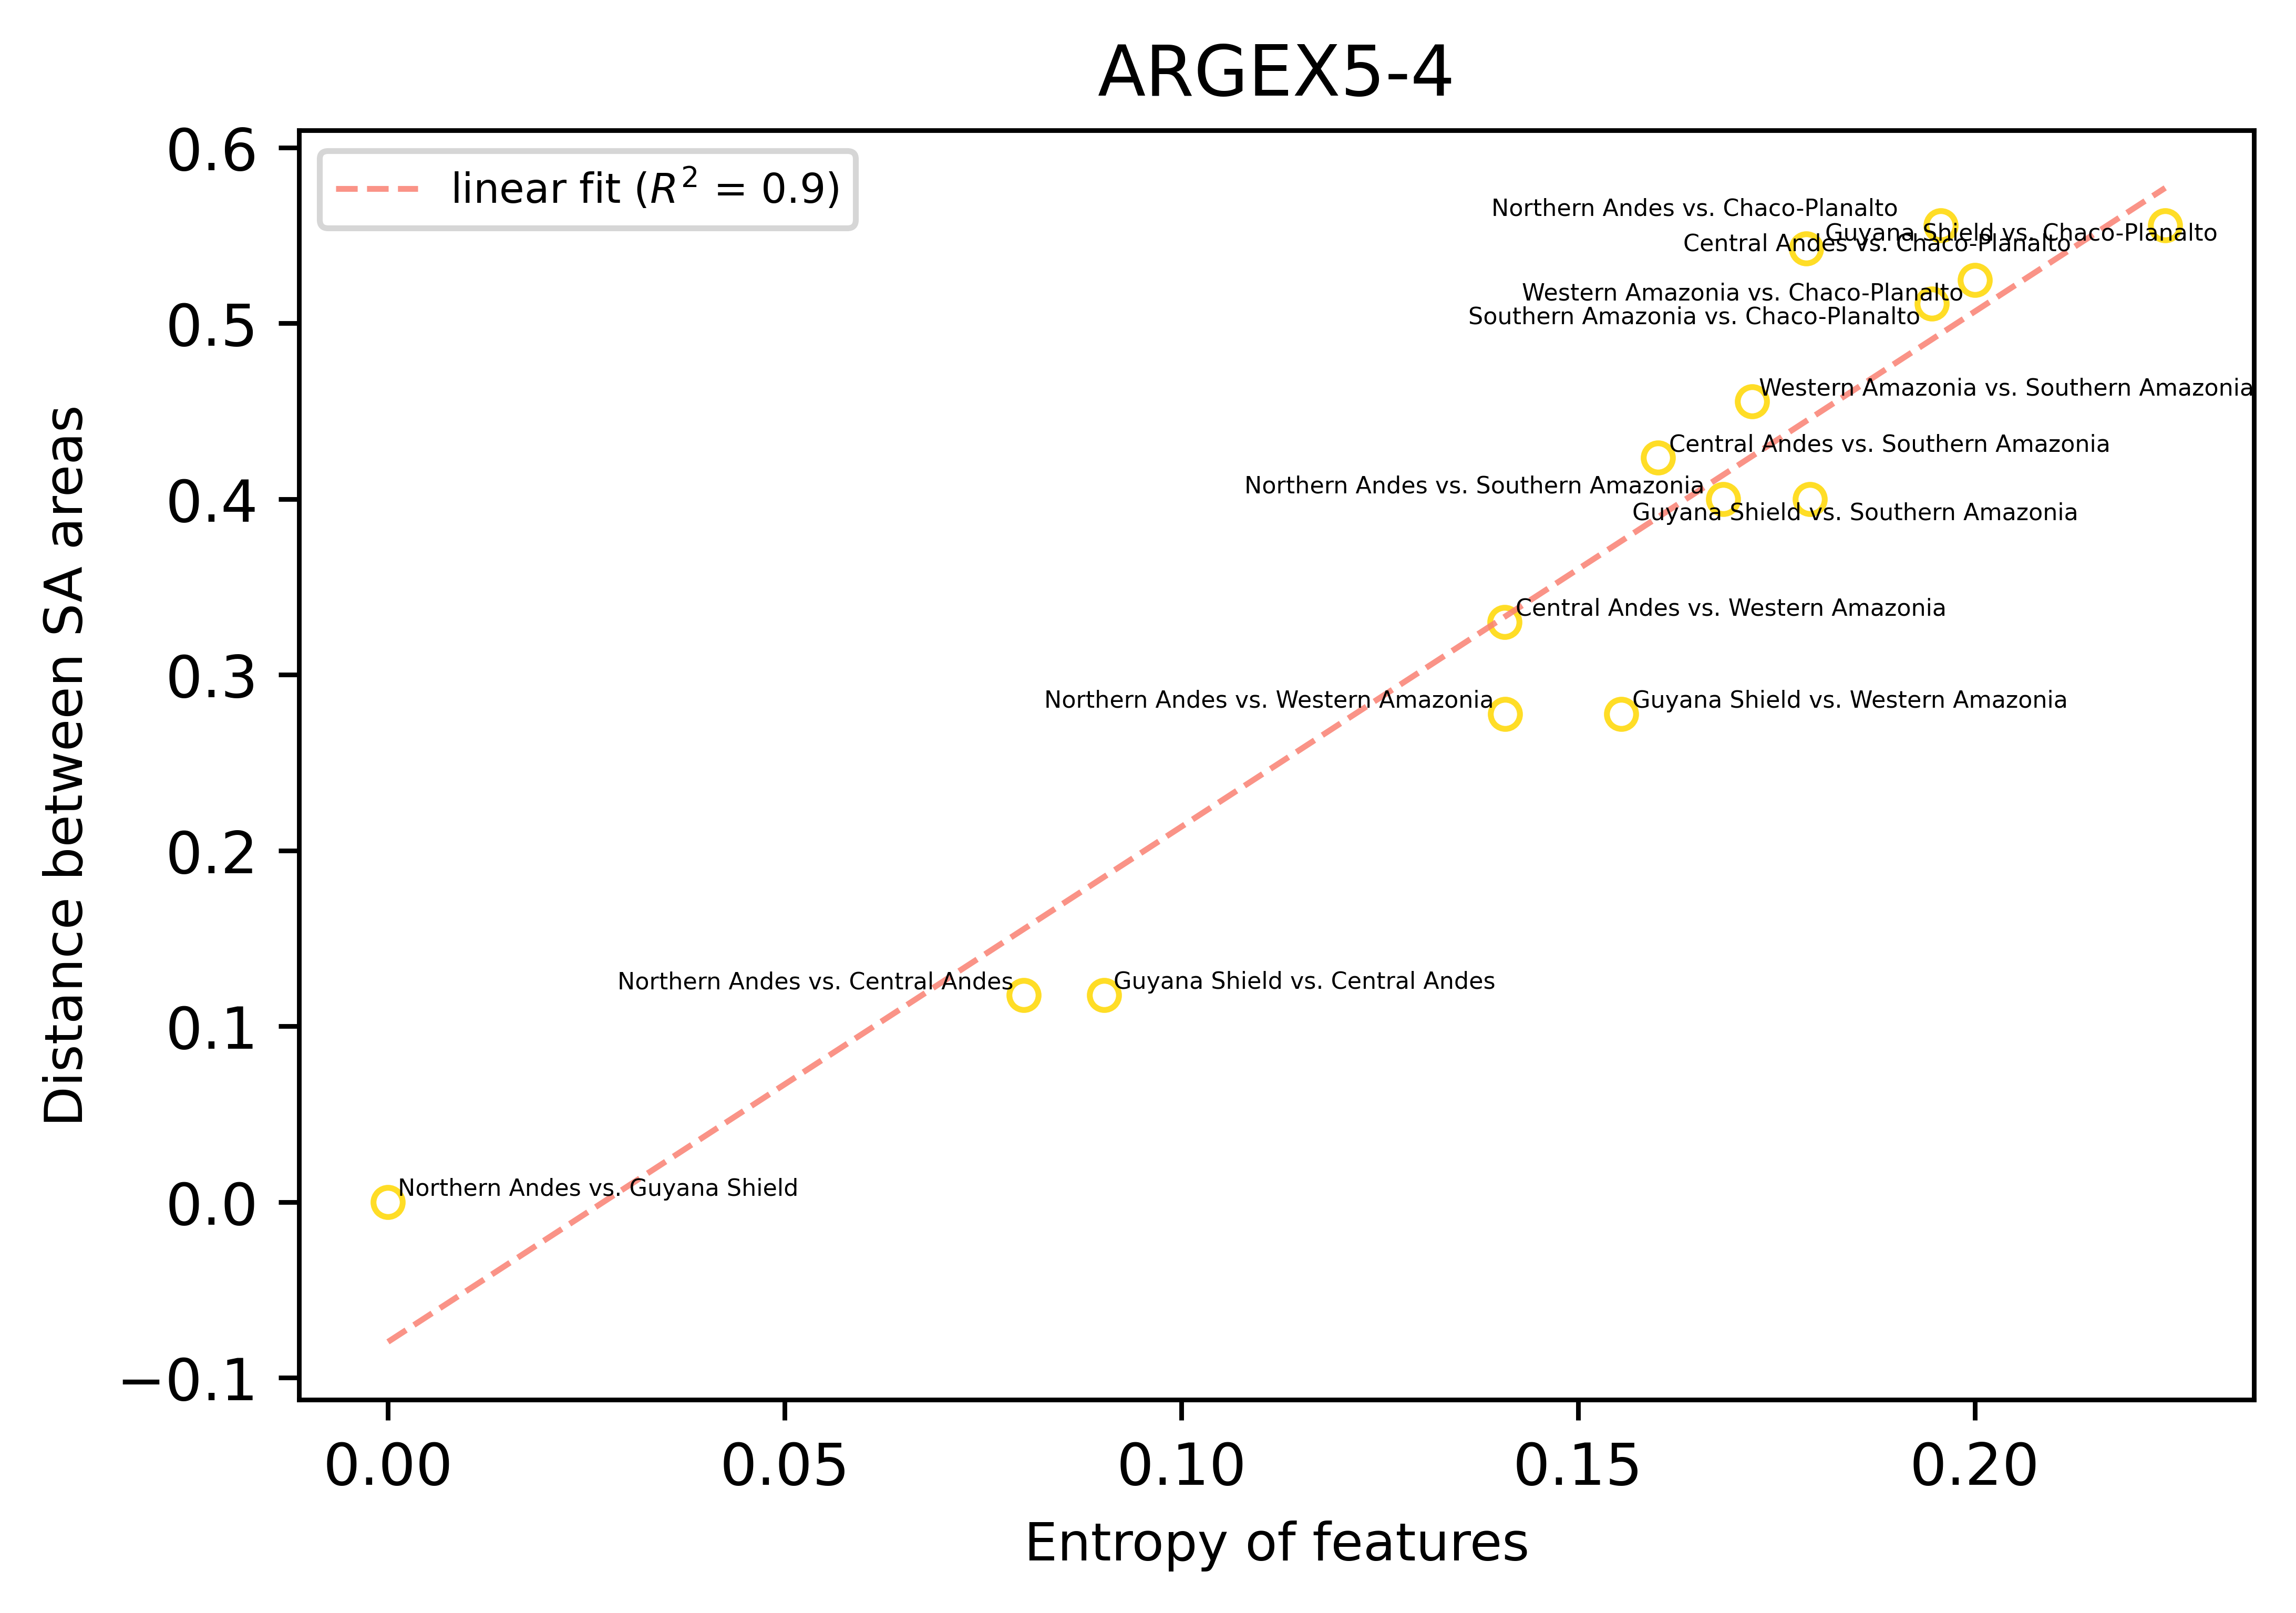

coefficient of determination: 0.6104294286491527


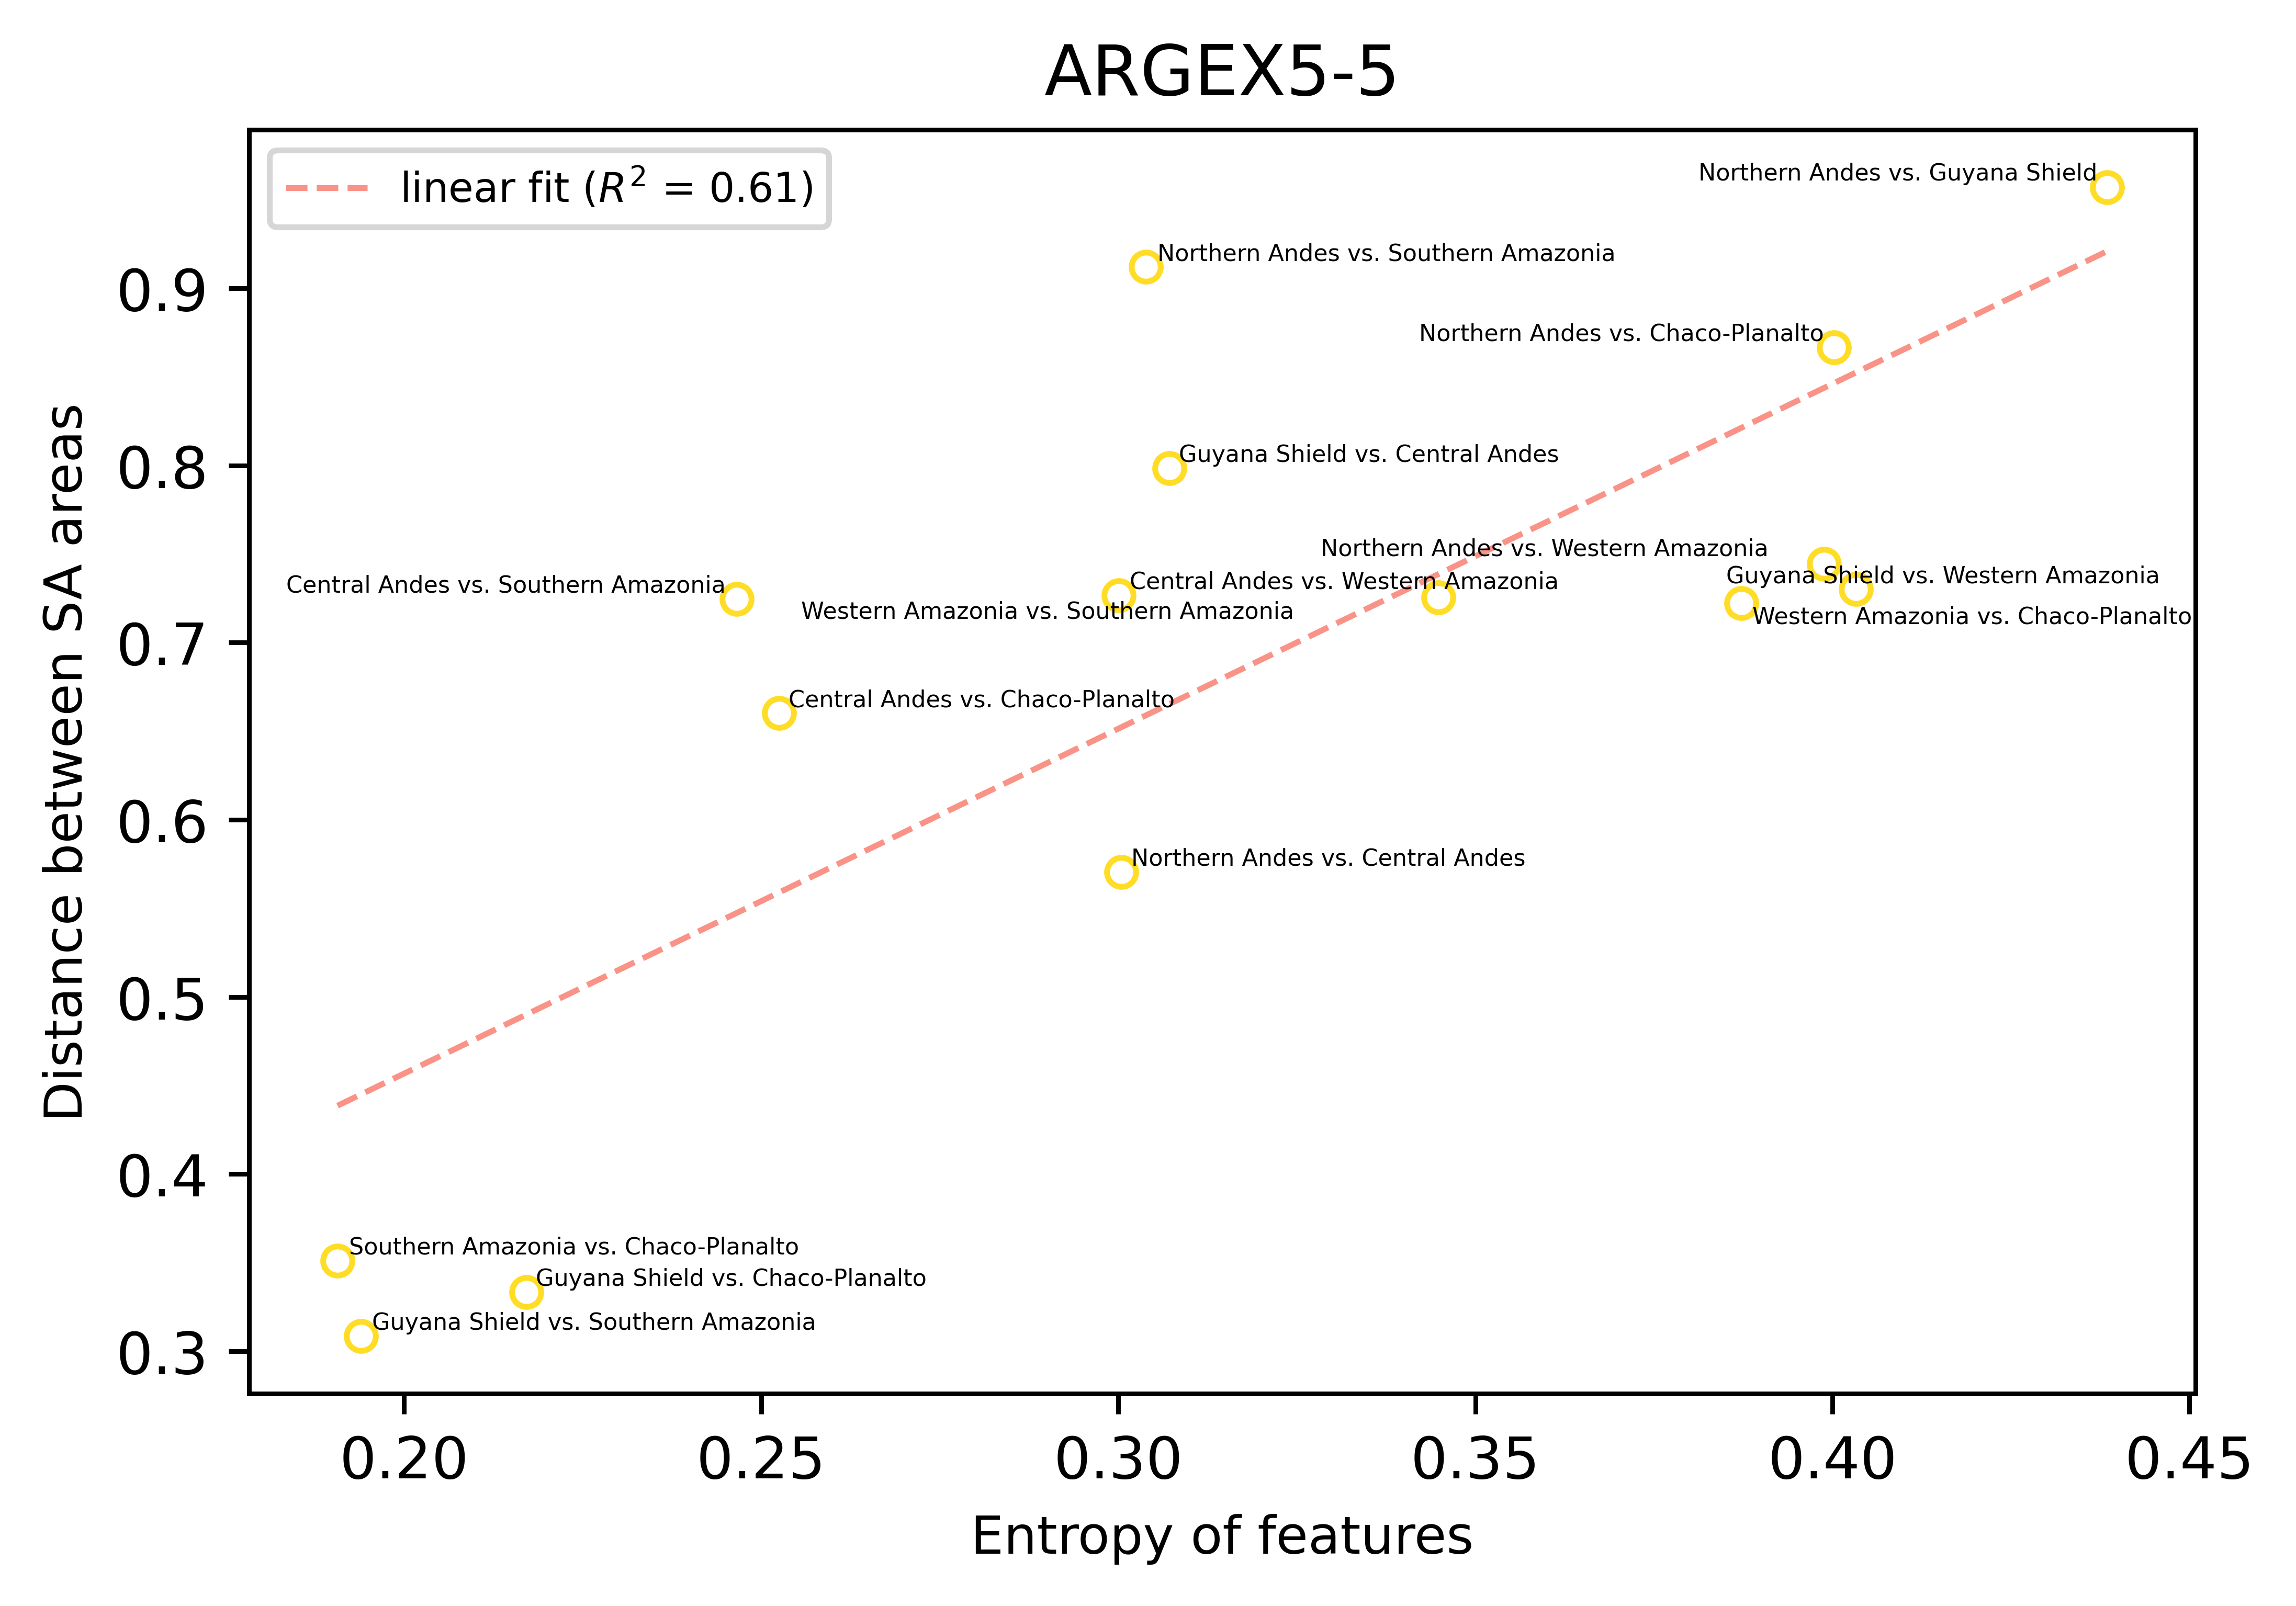

coefficient of determination: 0.5813604503697555


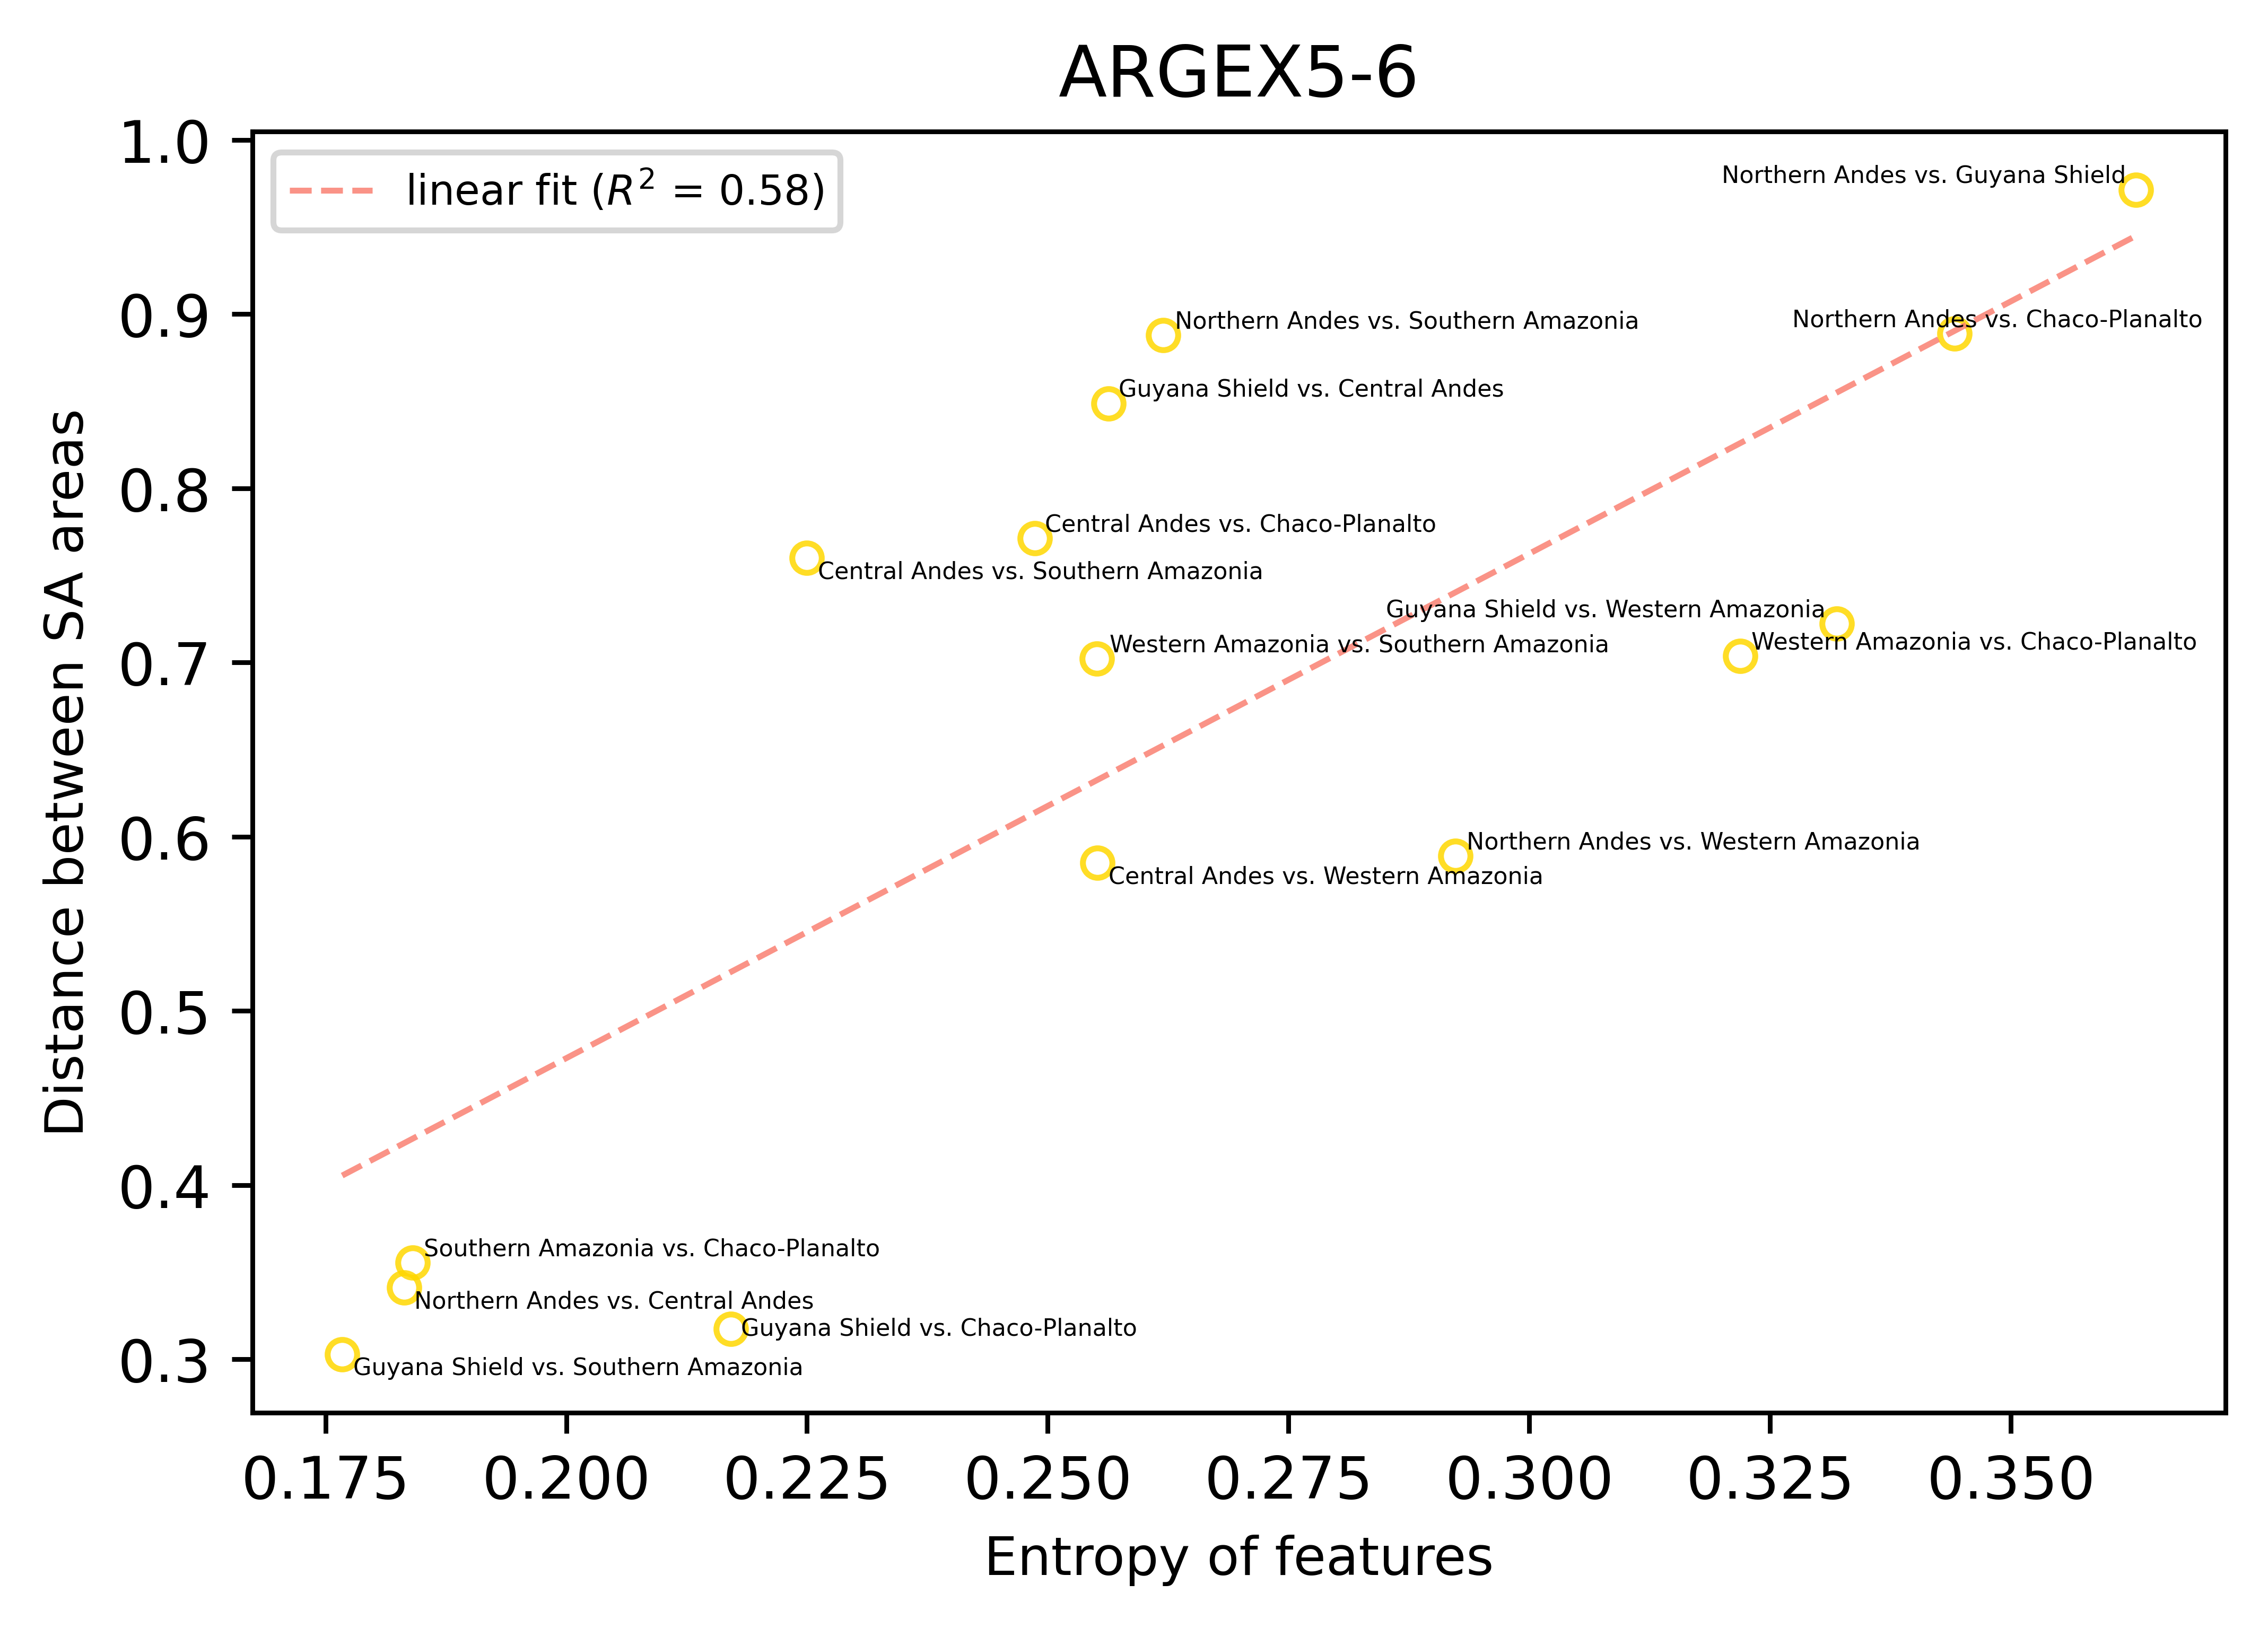

coefficient of determination: 0.31528568702979


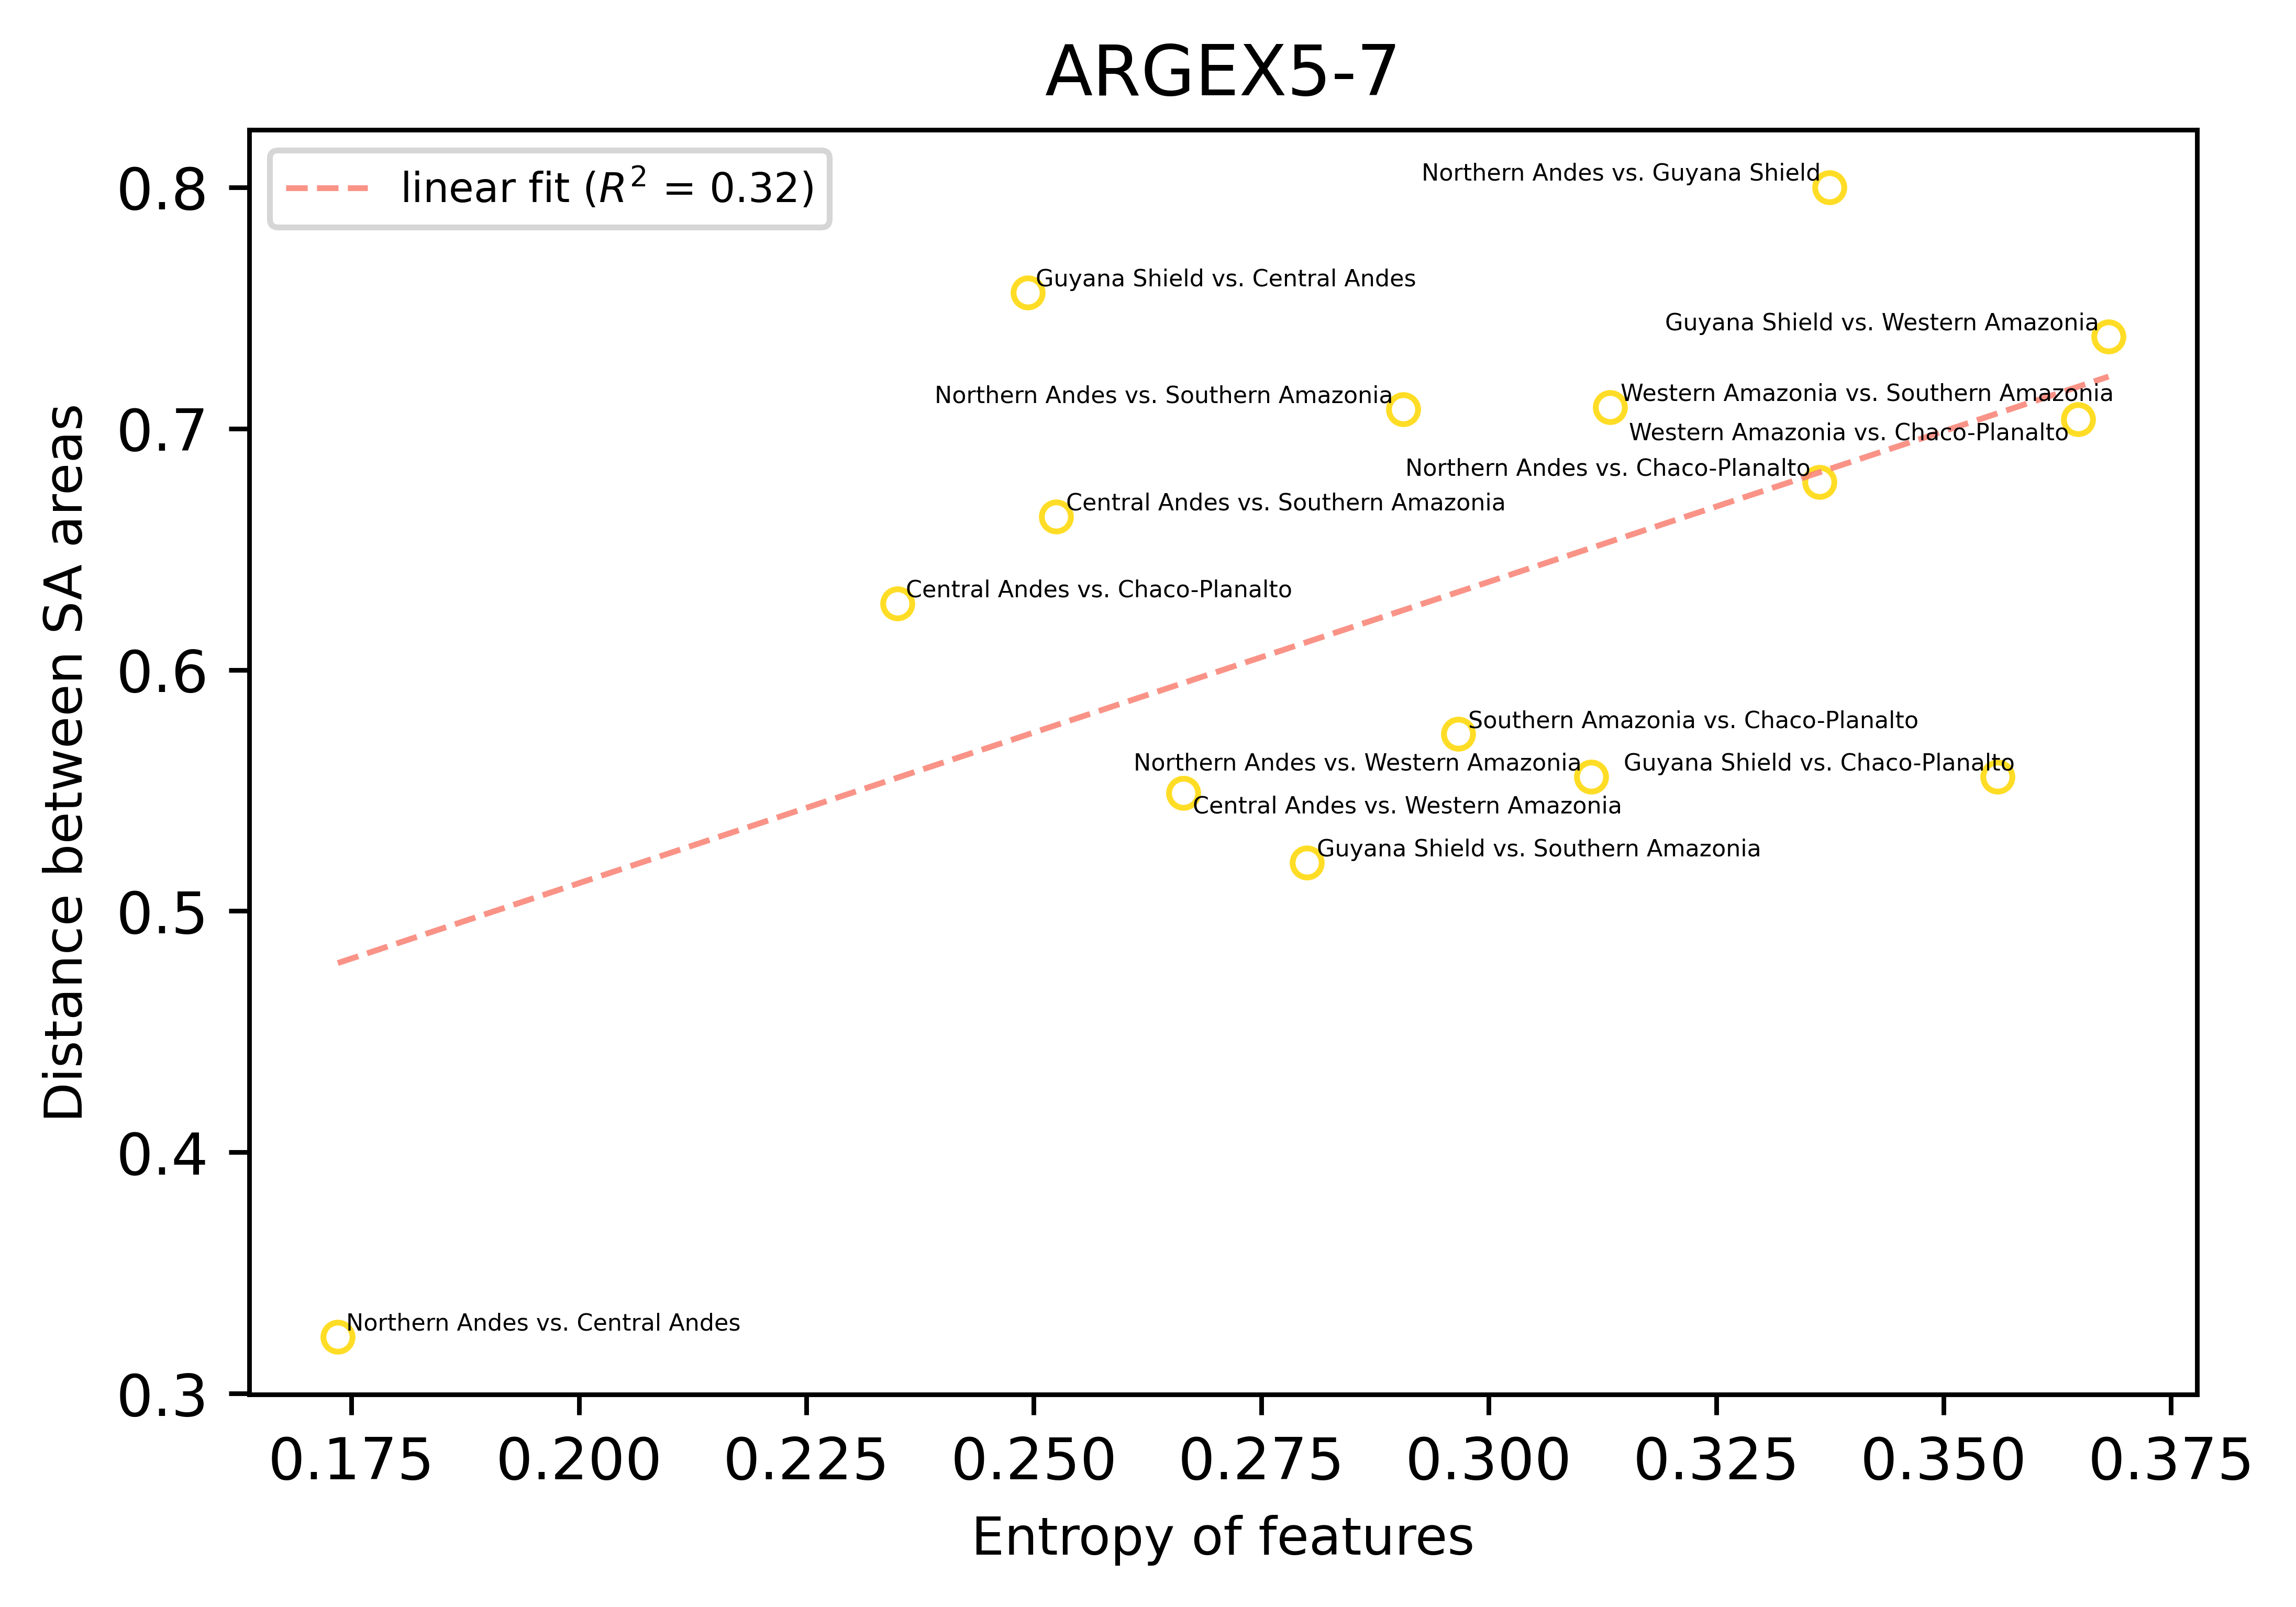

coefficient of determination: 0.6341463246294208


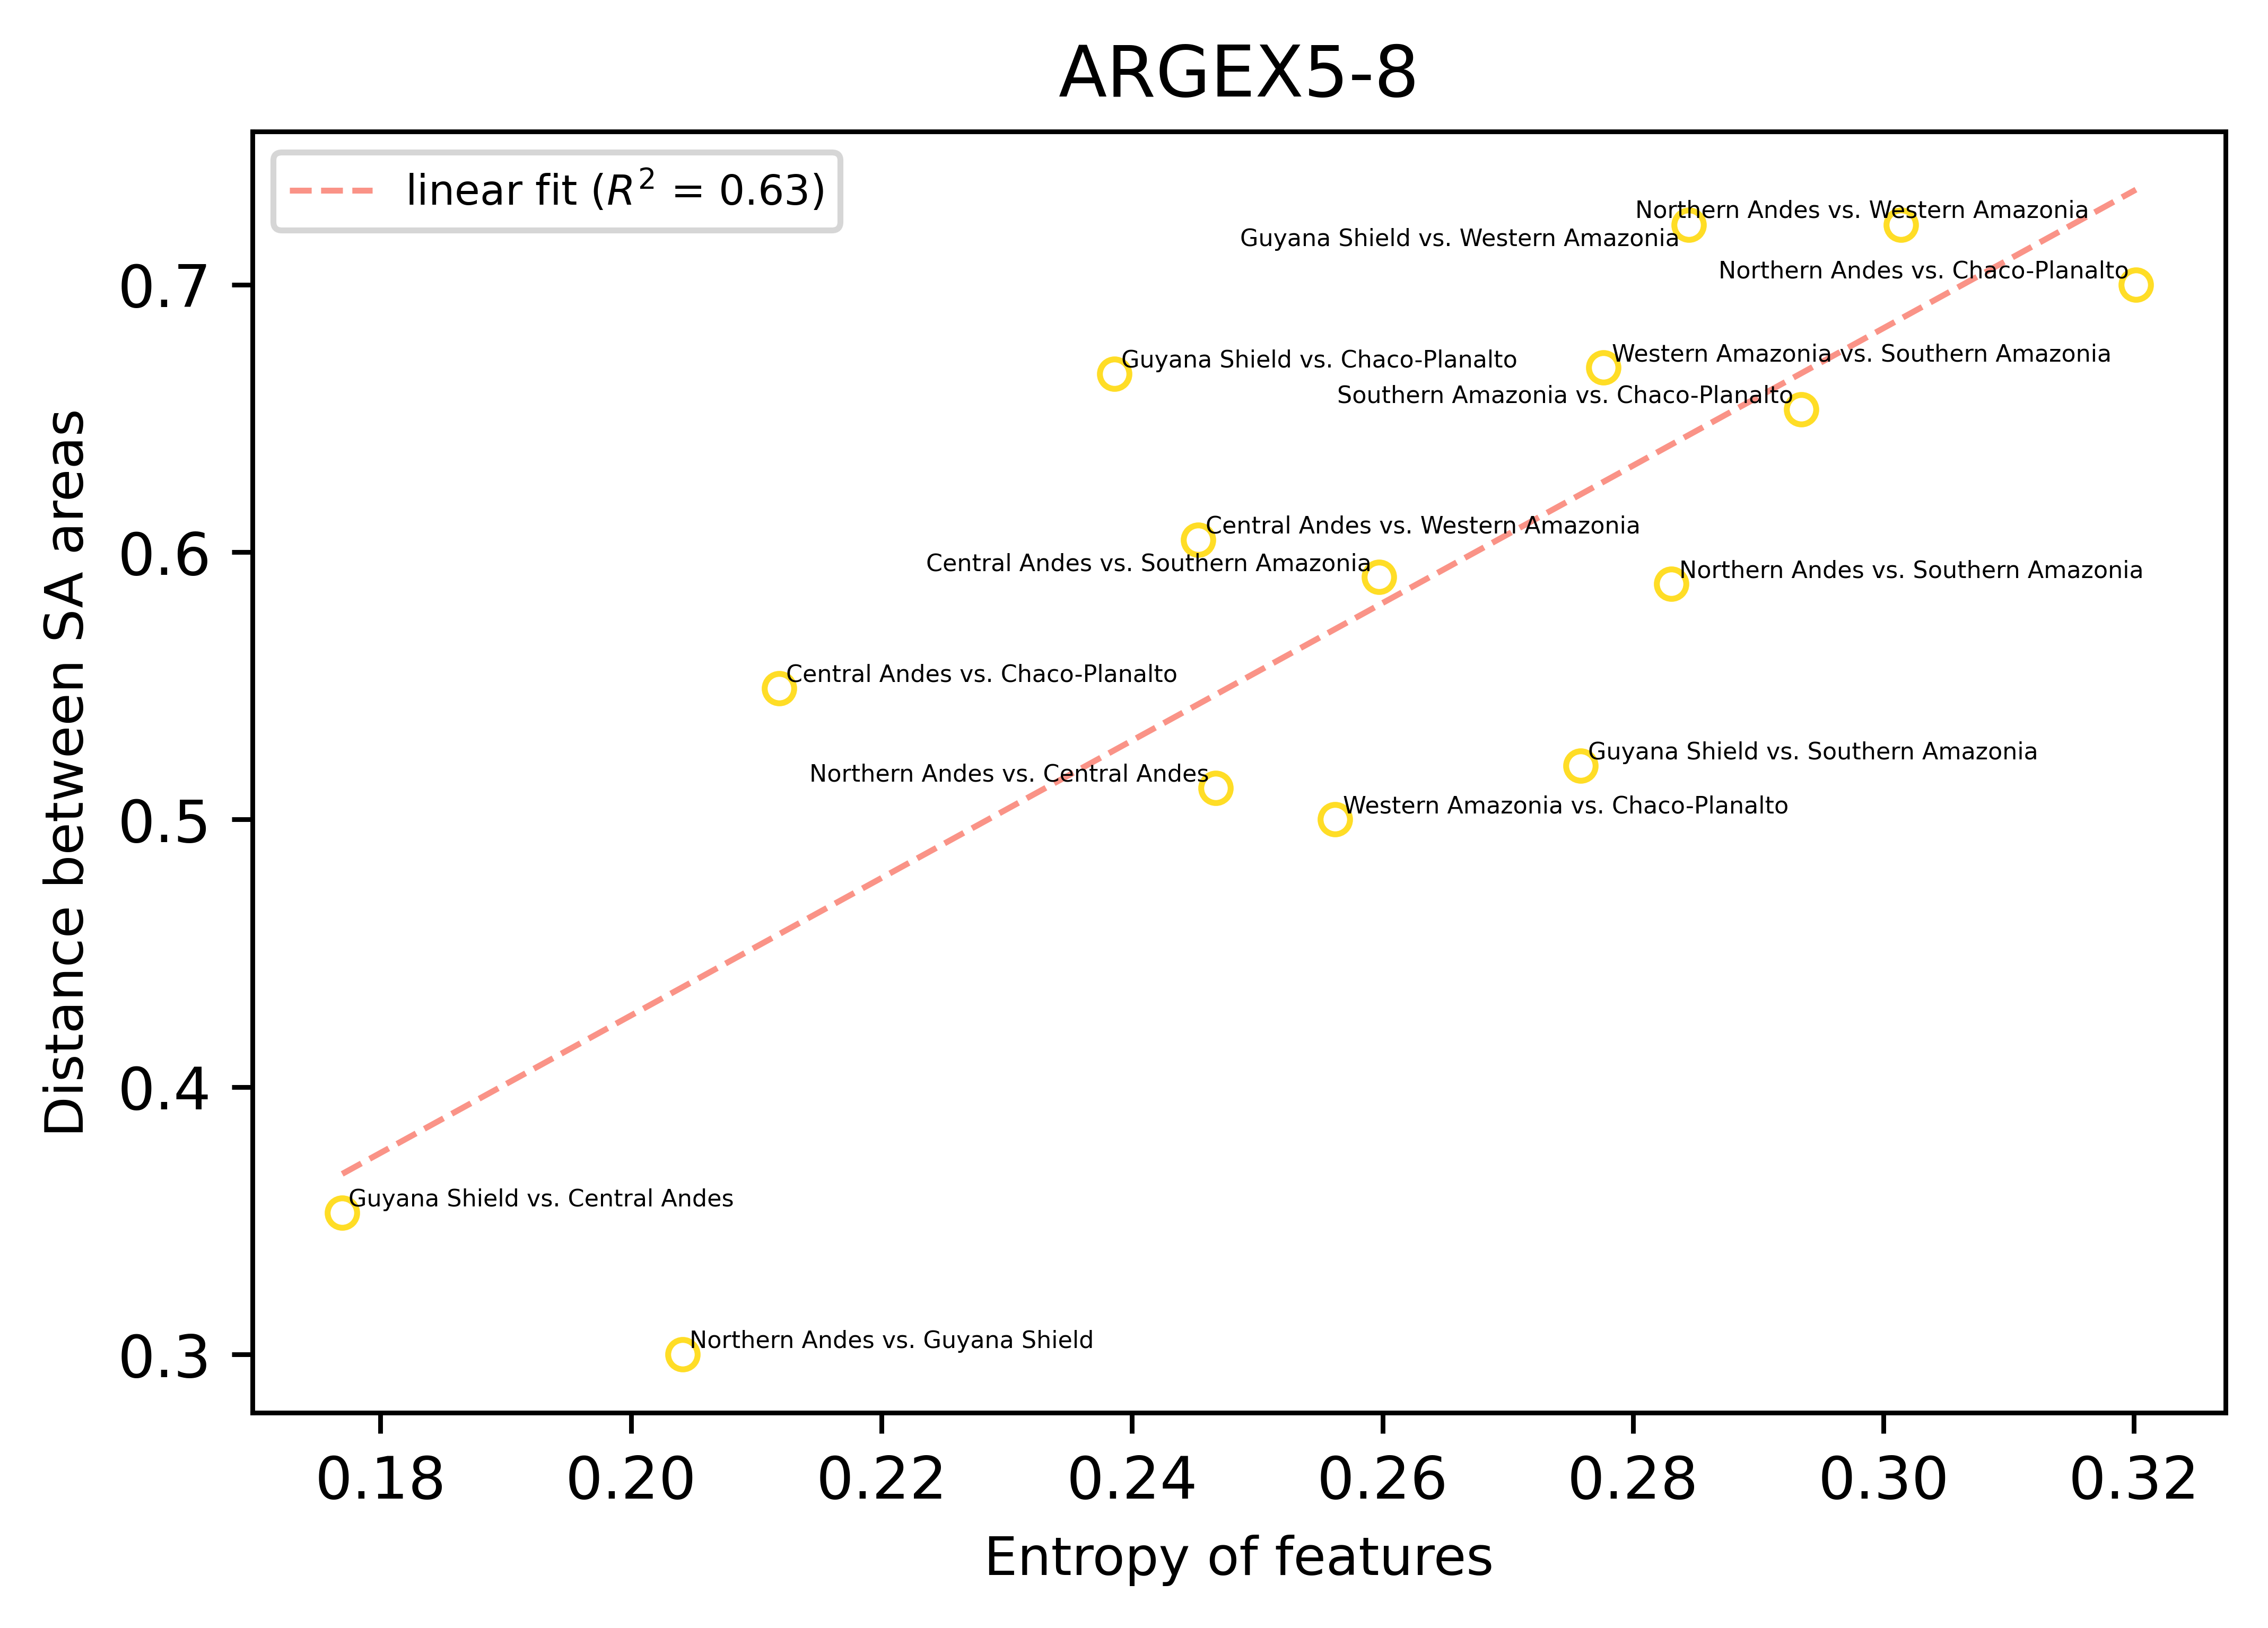

coefficient of determination: 0.8630344338286768


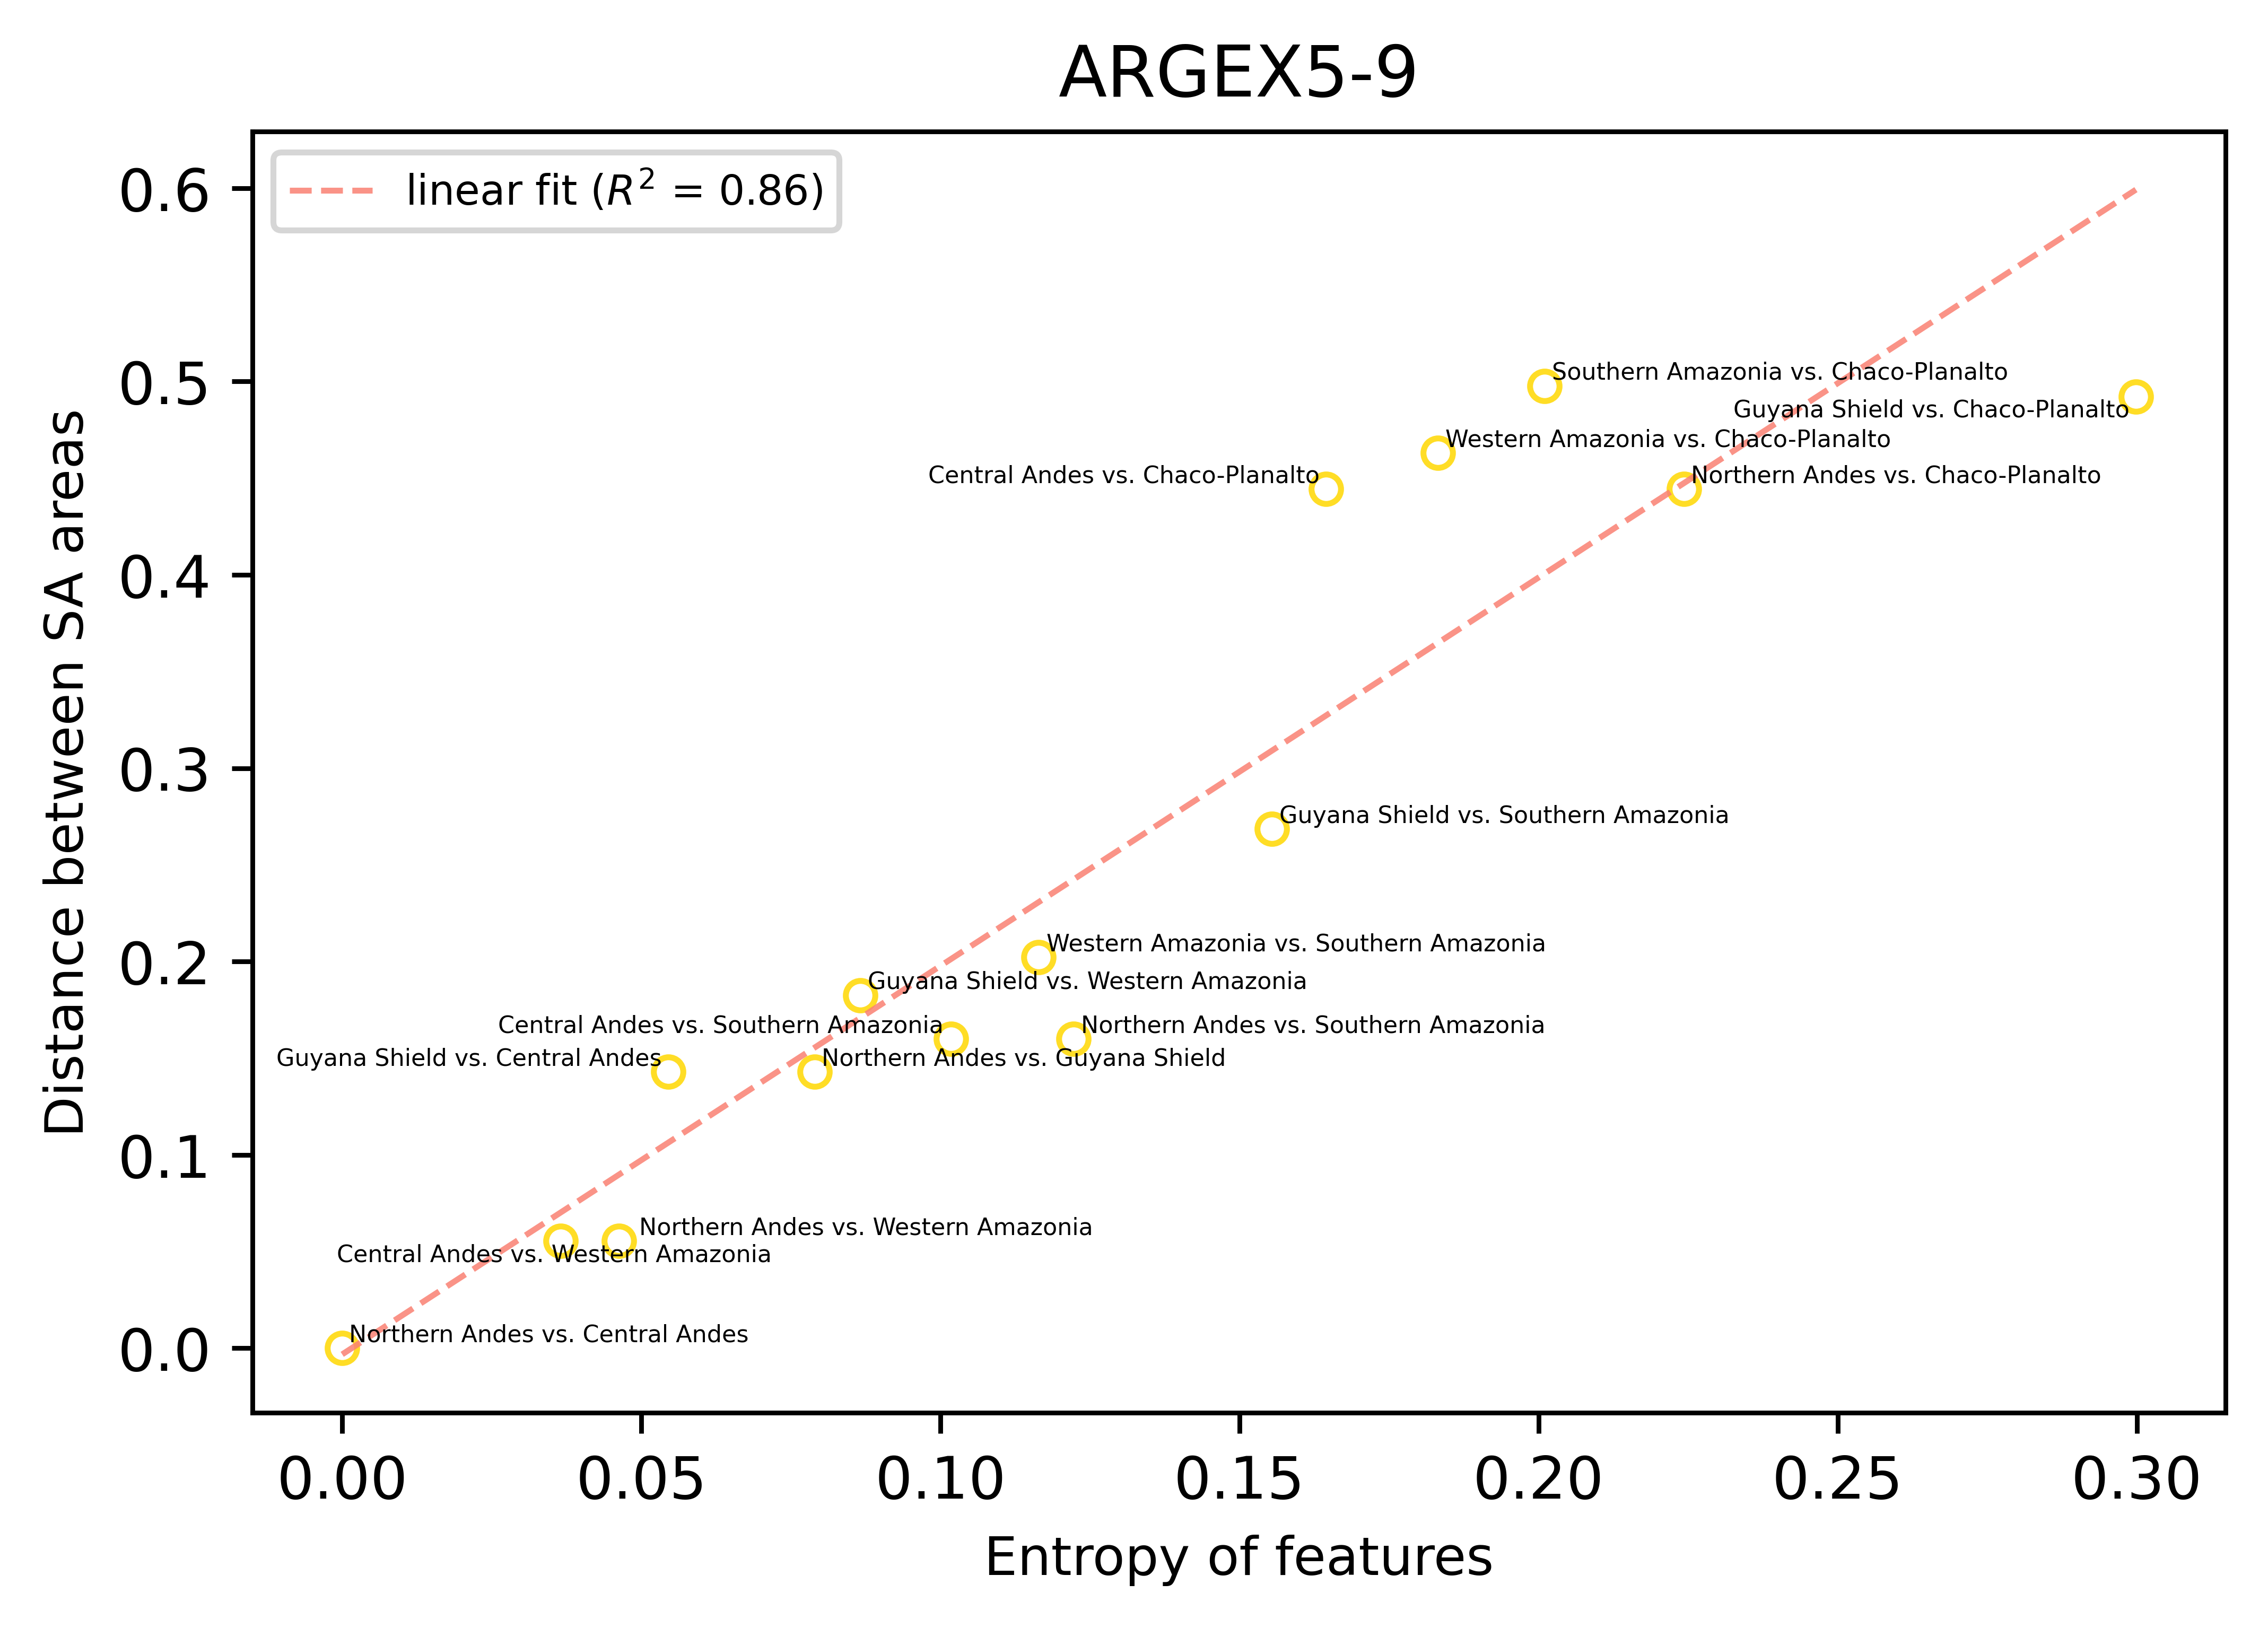

In [75]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

for feature in features_pred['mapu1245'].keys():
    fig, ax = plt.subplots(dpi=800)
    X = list(pairs_non_dict_entropy[feature].values())
    Y = list(pairs_non_dict_lev[feature].values())
    plt.plot(X,Y,marker='o',color='gold',markersize=5,linestyle='--',markeredgewidth=1,markeredgecolor='gold',alpha=0.85,linewidth=0,fillstyle='none',clip_on=True)
    texts = [plt.text(pairs_non_dict_entropy[feature][pair],pairs_non_dict_lev[feature][pair], pair[0]+' vs. '+pair[1], dict(size=4),ha='center', va='center') for pair in pairs_non]
    adjust_text(texts)
    #for pair in pairs_non:
        
    #    ax.annotate(pair[0]+' vs. '+pair[1], color='k', xy=(pairs_non_dict_entropy[feature][pair],pairs_non_dict_lev[feature][pair]), fontsize=4, alpha=0.85)

    x = np.array(X).reshape((-1, 1))
    y = np.array(Y)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)
    #ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')
    y_pred = model.predict(np.linspace(min(x),max(x),100).reshape((-1, 1)))
    ax.plot(np.linspace(min(x),max(x),100),y_pred,marker='x',color='salmon',markersize=0,linestyle='--',markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=1,fillstyle='full',clip_on=True,label=r'linear fit ($R^2$ = {})'.format(np.round(r_sq,2)))

    #plt.grid(False)
    plt.legend(loc='best',fontsize=7)
    plt.title(feature,fontsize=12)
    plt.xlabel(r'Entropy of features',fontsize=9)
    plt.ylabel(r'Distance between SA areas',fontsize=9)
    plt.rcParams.update({'font.size': 10})
    plt.savefig('entropyvsareas_'+feature+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

## (6) entropy x feature x birchall area

In [76]:
areas_birchall_WE = {}

for language in features_pred.keys():
    if areas_birchall[language] in ['Northern Andes','Central Andes','Western Amazonia','Southern Cone']:
        areas_birchall_WE[language]='Western SA'
    else:
        areas_birchall_WE[language]='Eastern SA'

In [77]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(areas_birchall_WE.items()):
    v[value].append(key)

In [78]:
areas = dict(v)

In [79]:
D_areas = {feature:{} for feature in features_pred['mapu1245'].keys()}

for feature in features_pred['mapu1245'].keys():
    for fam in areas.keys():
        D_areas[feature][fam]=entropy_area(feature,areas[fam])/entropy(range(len(areas[fam])))

In [80]:
D_WE_areas = pd.DataFrame.from_dict(D_areas)
D_WE_areas['average entropy'] = D_WE_areas.mean(numeric_only=True, axis=1)
languages = [len(areas[fam]) for fam in D_WE_areas.index]
D_WE_areas['number of languages'] = languages

In [81]:
D_WE_areas

ARGEX5-1  ARGEX5-2  ARGEX5-3  ARGEX5-4  ARGEX5-5  ARGEX5-6  \
Western SA  0.045706  0.118495  0.175240  0.126846  0.323679  0.227164   
Eastern SA -0.000000  0.086087  0.086087  0.176841  0.180211  0.169328   

            ARGEX5-7  ARGEX5-8  ARGEX5-9  average entropy  number of languages  
Western SA  0.233377  0.239730  0.026744         0.168553                   47  
Eastern SA  0.276585  0.263756  0.182328         0.157914                   41

In [82]:
lev_features = {}

for feature in features_pred['mapu1245'].keys():
    values_features = {'Western SA':[],'Eastern SA':[]}

    for language in features_pred.keys():
        values_features[areas_birchall_WE[language]]+=[features_pred[language][feature]]
    products = itertools.product(values_features['Western SA'],values_features['Eastern SA'])
    LEN=0
    N=0
    for v1, v2 in products:
        if v1!=v2:
            LEN+=1
        N+=1
    lev_features[feature]=LEN/N#1-len(list(chain.from_iterable([(val,)*min(values_features['Western SA'].count(val), values_features['Eastern SA'].count(val)) for val in (set(values_features['Western SA']) & set(values_features['Eastern SA']))])))/min(len(values_features['Western SA']),len(values_features['Eastern SA']))#textdistance.levenshtein.distance(values_features['Western SA'],values_features['Eastern SA'])/max(len(values_features['Western SA']),len(values_features['Eastern SA']))

In [83]:
lev_features

{'ARGEX5-1': 0.0425531914893617,
 'ARGEX5-2': 0.23456149455111572,
 'ARGEX5-3': 0.5770627919045148,
 'ARGEX5-4': 0.41722885313959523,
 'ARGEX5-5': 0.7581733264141152,
 'ARGEX5-6': 0.7669953295277634,
 'ARGEX5-7': 0.6922677737415672,
 'ARGEX5-8': 0.5900363258951739,
 'ARGEX5-9': 0.233523611831863}

coefficient of determination: 0.9272656403807482


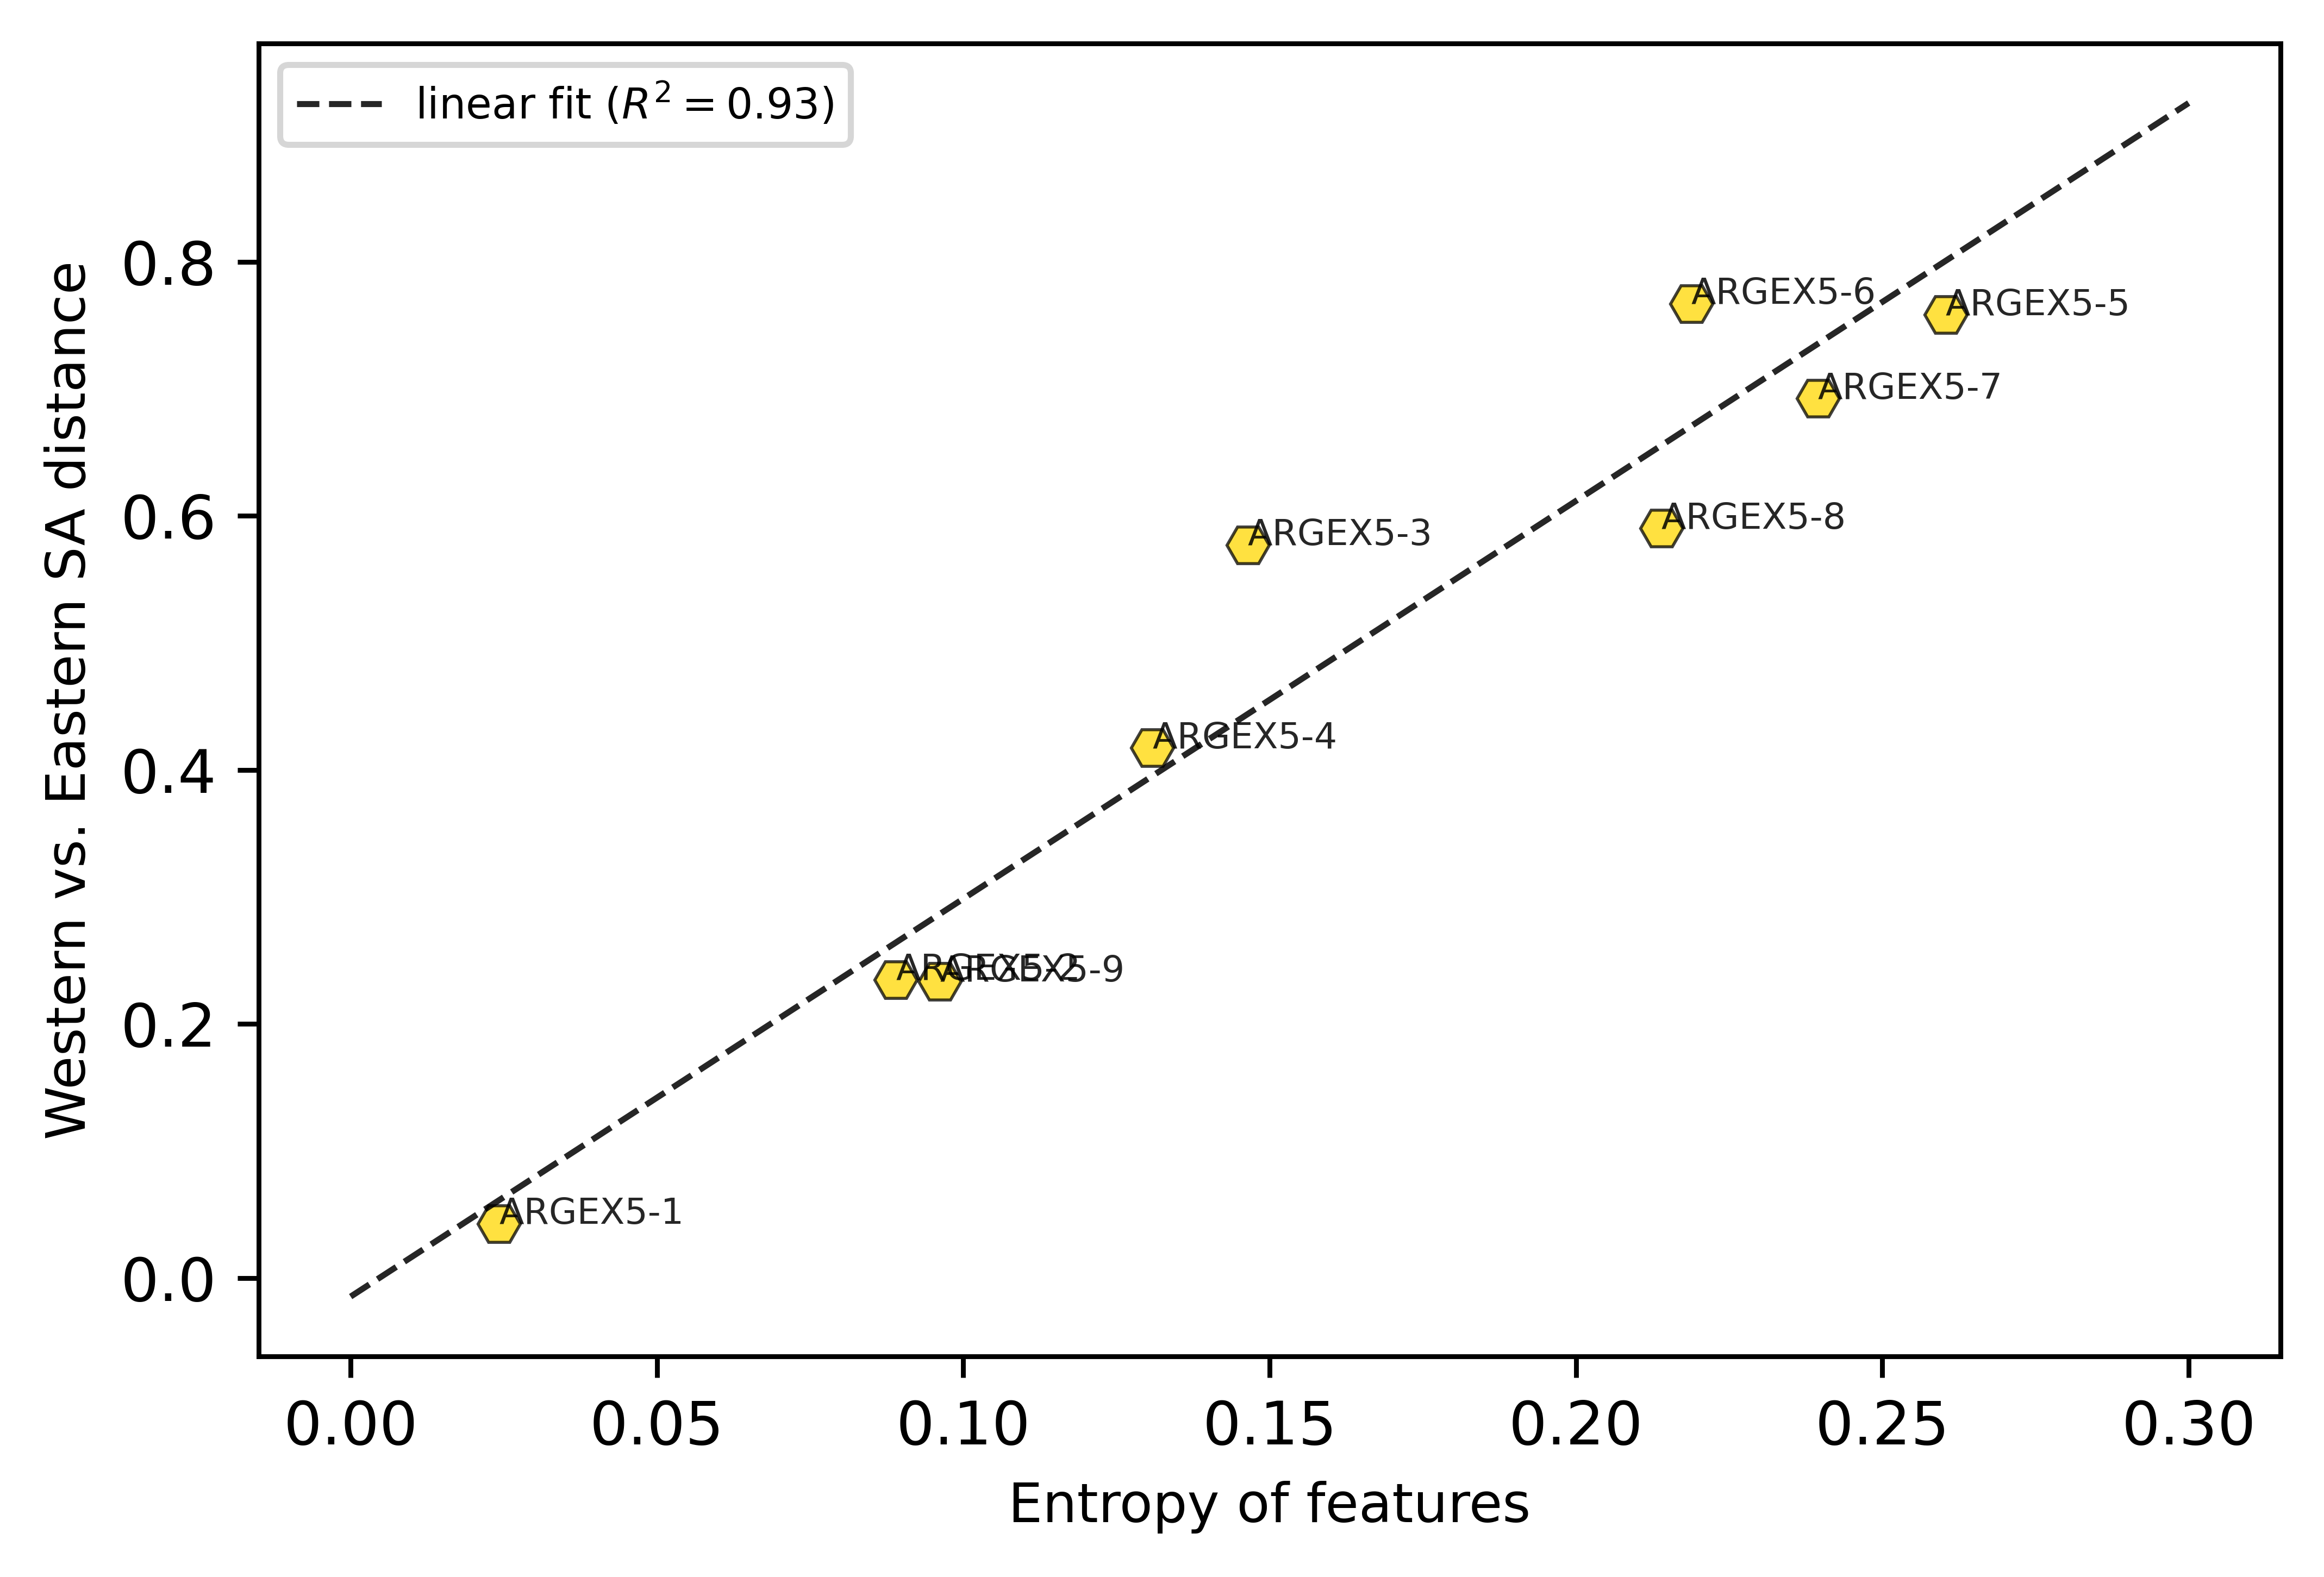

In [84]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(dpi=800)

ax.plot([D_all_dict[key] for key in D_all_dict.keys()],[lev_features[key] for key in D_all_dict.keys()],marker='H',color='gold',markersize=7,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)
for feature in D_all_dict.keys():

    ax.annotate(feature, color='k', xy=(D_all_dict[feature],lev_features[feature]), fontsize=6, alpha=0.85)

    
x = np.array([D_all_dict[key] for key in D_all_dict.keys()]).reshape((-1, 1))
y = np.array([lev_features[key] for key in D_all_dict.keys()])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
#ax.plot(X,Y,marker='x',color='k',markersize=6,markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=0,fillstyle='full',clip_on=True,label='Others')
y_pred = model.predict(np.linspace(0,0.3,100).reshape((-1, 1)))
ax.plot(np.linspace(0,0.3,100),y_pred,marker='x',color='k',markersize=0,linestyle='--',markeredgewidth=1,markeredgecolor='k',alpha=0.85,linewidth=1,fillstyle='full',clip_on=True,label=r'linear fit ($R^2 = 0.93$)')

#plt.grid(False)
plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'Entropy of features',fontsize=9)
plt.ylabel(r'Western vs. Eastern SA distance',fontsize=9)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropyvsWE.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()